Christian Braga - Loris Salsi 

Statistical Learning project

<h1> PROJECT OVERVIEW </H1>

Project Purpose
The primary goal of this project is to analyze and predict power generation data from two solar power plants. We aim to:

Predict power generation.
Identify the need for panel cleaning or maintenance.

<h2> Dataset Description </h2>

This data has been gathered at two solar power plants in India over a 34 day period. It has two pairs of files - each pair has one power generation dataset and one sensor readings dataset. The power generation datasets are gathered at the inverter level - each inverter has multiple lines of solar panels attached to it. The sensor data is gathered at a plant level - single array of sensors optimally placed at the plant.

<h2>Index</h2>

1. Exploratory data analysis

2. Statistical models:
   - Multiple Linear Regression
   - Forward Stepwise Selection
   - Lasso Regression 
   - Decision Tree Regression 
   - Random Forest Regression
   - Multinomial Logistic Regression
   - Linear Discriminant Analysis (LDA)
   - K-Nearest Neighbors (KNN) 
   - Random Forest Classifier



<h2>Importing Libraries </h2>

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<H2>Exploratory Data Analysis </h2>

<h3>Loading The Datasets</h3>

In [2]:
p1_gen_df = pd.read_csv('Plant_1_Generation_Data.csv')
p2_gen_df = pd.read_csv('Plant_2_Generation_Data.csv')
p1_wea_df = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
p2_wea_df = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

<h3> EDA Generation Data Plant 1</h3>

<h3>First Look </h3>

In [3]:
#first 5 rows of the generation data for plant 1
p1_gen_df.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0

In [4]:
#last 5 rows of the generation data for plant 1
p1_gen_df.tail(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
68773  17-06-2020 23:45   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774  17-06-2020 23:45   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775  17-06-2020 23:45   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776  17-06-2020 23:45   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777  17-06-2020 23:45   4135001  zVJPv84UY57bAof       0.0       0.0   

       DAILY_YIELD  TOTAL_YIELD  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0

<h3>Shape and Size</h3>

In [5]:
# shape and size of the dataset
p1_gen_shape = p1_gen_df.shape
p1_gen_size = p1_gen_df.size
print(f'The Generation Data for the plant 1 is composed by: {p1_gen_shape[0]} rows and {p1_gen_shape[1]} columns.\nFor a total of {p1_gen_size} values')

The Generation Data for the plant 1 is composed by: 68778 rows and 7 columns.
For a total of 481446 values


<h3>Dataframe Info</h3>

In [6]:
#information about the Generation Data for the plant 1
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


The dataframe info command give us useful information about the type of the features, the number of null-values and the dimension of the dataset. We can simply notice that for each columns of the dataset the number of non-null values is the same of the number of rows of the entire dataset, it means that we don't have null values.

<h3>Missing Data </h3>

In [7]:
#to be sure, we can still check for null values
p1_gen_df.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [8]:
#statistics description of the generation data for the plant 1
p1_gen_df.describe().T

count          mean            std        min           25%  \
PLANT_ID     68778.0  4.135001e+06       0.000000  4135001.0  4.135001e+06   
DC_POWER     68778.0  3.147426e+03    4036.457169        0.0  0.000000e+00   
AC_POWER     68778.0  3.078028e+02     394.396439        0.0  0.000000e+00   
DAILY_YIELD  68778.0  3.295969e+03    3145.178309        0.0  0.000000e+00   
TOTAL_YIELD  68778.0  6.978712e+06  416271.982856  6183645.0  6.512003e+06   

                      50%           75%          max  
PLANT_ID     4.135001e+06  4.135001e+06  4135001.000  
DC_POWER     4.290000e+02  6.366964e+03    14471.125  
AC_POWER     4.149375e+01  6.236187e+02     1410.950  
DAILY_YIELD  2.658714e+03  6.274000e+03     9163.000  
TOTAL_YIELD  7.146685e+06  7.268706e+06  7846821.000

<h3>Column Names</h3>

In [9]:
#adjusting the name of the columns in order to make it easier to work with
p1_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [10]:
#adjusting the name of the columns in order to make it easier to work with
p2_gen_df.columns = list(map(lambda x : x.lower(),p1_gen_df.columns))
p2_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

<h3>Feature Analysis</h3>

In [11]:
#date_time
p1_gen_df['date_time']

0        15-05-2020 00:00
1        15-05-2020 00:00
2        15-05-2020 00:00
3        15-05-2020 00:00
4        15-05-2020 00:00
               ...       
68773    17-06-2020 23:45
68774    17-06-2020 23:45
68775    17-06-2020 23:45
68776    17-06-2020 23:45
68777    17-06-2020 23:45
Name: date_time, Length: 68778, dtype: object

In the date time column we have the values every 15 min from 15-05-2020 0:00 until 17-06-2020 23:45. In order to make it easier to work with dates we convert them to time date format

In [12]:
#transoform the variable date_time in format date time
p1_gen_df['date_time'] = pd.to_datetime(p1_gen_df['date_time'],format='%d-%m-%Y %H:%M')
p1_gen_df['date_time'].dtype

dtype('<M8[ns]')

In [13]:
p1_gen_df['date_time']

0       2020-05-15 00:00:00
1       2020-05-15 00:00:00
2       2020-05-15 00:00:00
3       2020-05-15 00:00:00
4       2020-05-15 00:00:00
                ...        
68773   2020-06-17 23:45:00
68774   2020-06-17 23:45:00
68775   2020-06-17 23:45:00
68776   2020-06-17 23:45:00
68777   2020-06-17 23:45:00
Name: date_time, Length: 68778, dtype: datetime64[ns]

I create a function to figure out which days we have observations for:

In [14]:
#extract all the days that are observed in our dataset
def days_analyzed():
    copy1 = p1_gen_df.copy()
    copy1['day_month_year'] = copy1['date_time'].dt.strftime('%d-%m-%Y')
    date_list = []
    for i in copy1['day_month_year']:
        if i not in date_list:
            date_list.append(i)
    return date_list
days_analyzed()

['15-05-2020',
 '16-05-2020',
 '17-05-2020',
 '18-05-2020',
 '19-05-2020',
 '20-05-2020',
 '21-05-2020',
 '22-05-2020',
 '23-05-2020',
 '24-05-2020',
 '25-05-2020',
 '26-05-2020',
 '27-05-2020',
 '28-05-2020',
 '29-05-2020',
 '30-05-2020',
 '31-05-2020',
 '01-06-2020',
 '02-06-2020',
 '03-06-2020',
 '04-06-2020',
 '05-06-2020',
 '06-06-2020',
 '07-06-2020',
 '08-06-2020',
 '09-06-2020',
 '10-06-2020',
 '11-06-2020',
 '12-06-2020',
 '13-06-2020',
 '14-06-2020',
 '15-06-2020',
 '16-06-2020',
 '17-06-2020']

We can observe that the days taken into consideration are from 15-05-2020 to 17-06-2020

In [15]:
#source_key
p1_invertes = list(p1_gen_df['source_key'].value_counts().index)
p1_invertes

['bvBOhCH3iADSZry',
 '1BY6WEcLGh8j5v7',
 '7JYdWkrLSPkdwr4',
 'VHMLBKoKgIrUVDU',
 'ZnxXDlPa8U1GXgE',
 'ih0vzX44oOqAx2f',
 'z9Y9gH1T5YWrNuG',
 'wCURE6d3bPkepu2',
 'uHbuxQJl8lW7ozc',
 'pkci93gMrogZuBj',
 'iCRJl6heRkivqQ3',
 'rGa61gmuvPhdLxV',
 'sjndEbLyjtCKgGv',
 'McdE0feGgRqW7Ca',
 'zVJPv84UY57bAof',
 'ZoEaEvLYb1n2sOq',
 '1IF53ai7Xc0U56Y',
 'adLQvlD726eNBSB',
 'zBIq5rxdHJRwDNY',
 'WRmjgnKYAwPKWDb',
 '3PZuoBAID5Wc2HD',
 'YxYtjZvoooNbGkE']

The Plant 1 is composed by 22 inversters which we have observations over time, those above are the names of the different inverters.

To facilitate the following analysis we transform the type of the source_key column from object to string

In [16]:
p1_gen_df['source_key'] = p1_gen_df['source_key'].astype(str)

Plotting the Histograms of the features:

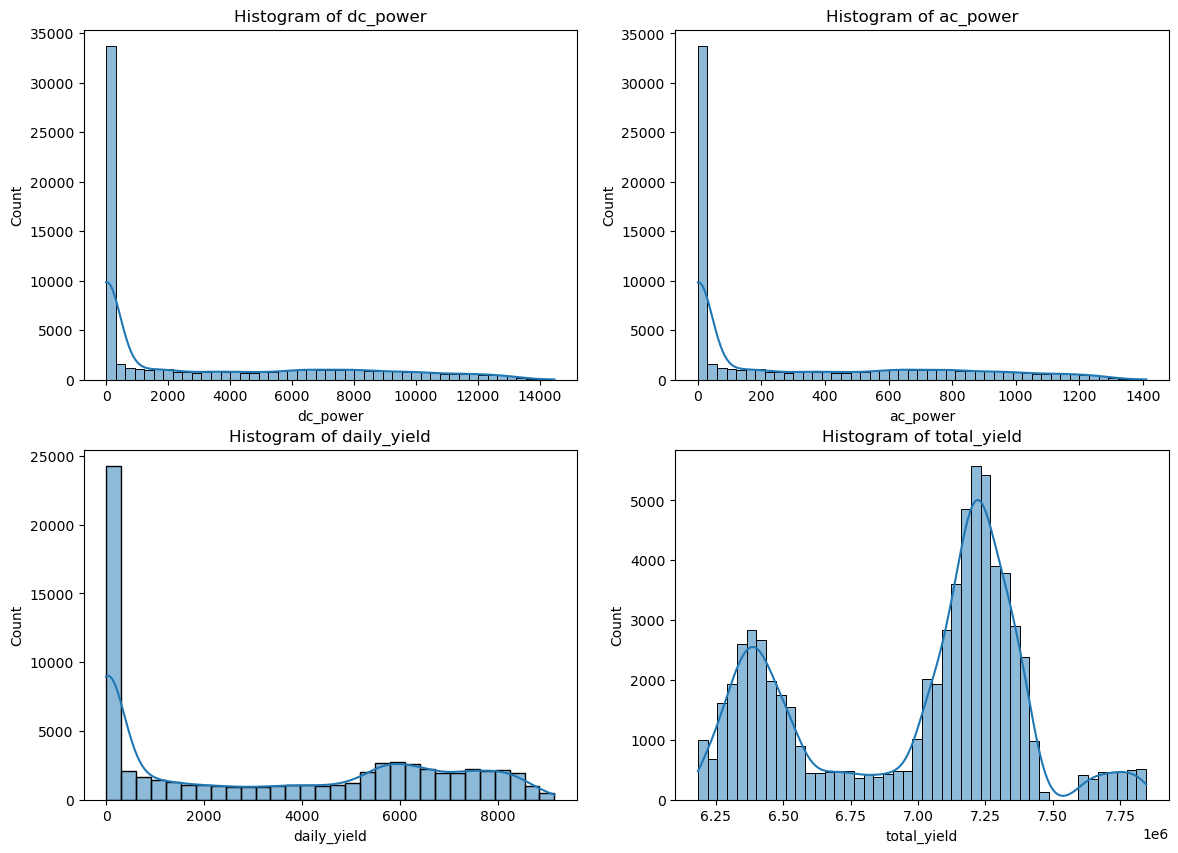

In [17]:
#creating the histograms for this columns
columns_to_check = ['dc_power','ac_power','daily_yield','total_yield']

num_col = 2
num_rows = 2

#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))

axes = axes.flatten()

for ax, col in zip(axes, columns_to_check):
    sns.histplot(p1_gen_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
    plt.grid(False)

plt.show()

<h3>Observations </h3>

We can see that the histograms for AC_power and DC_power have numerous values of 0, this is due to the fact that during nighttime hours the inverters are unable to produce power. In the following analyses we are going to investigate whether these values are always correct or sometimes they may be due to some kind of malfunctioning. In indeed, some of these 0.0 output values could mean that the inverters/sensors are malfunctioning

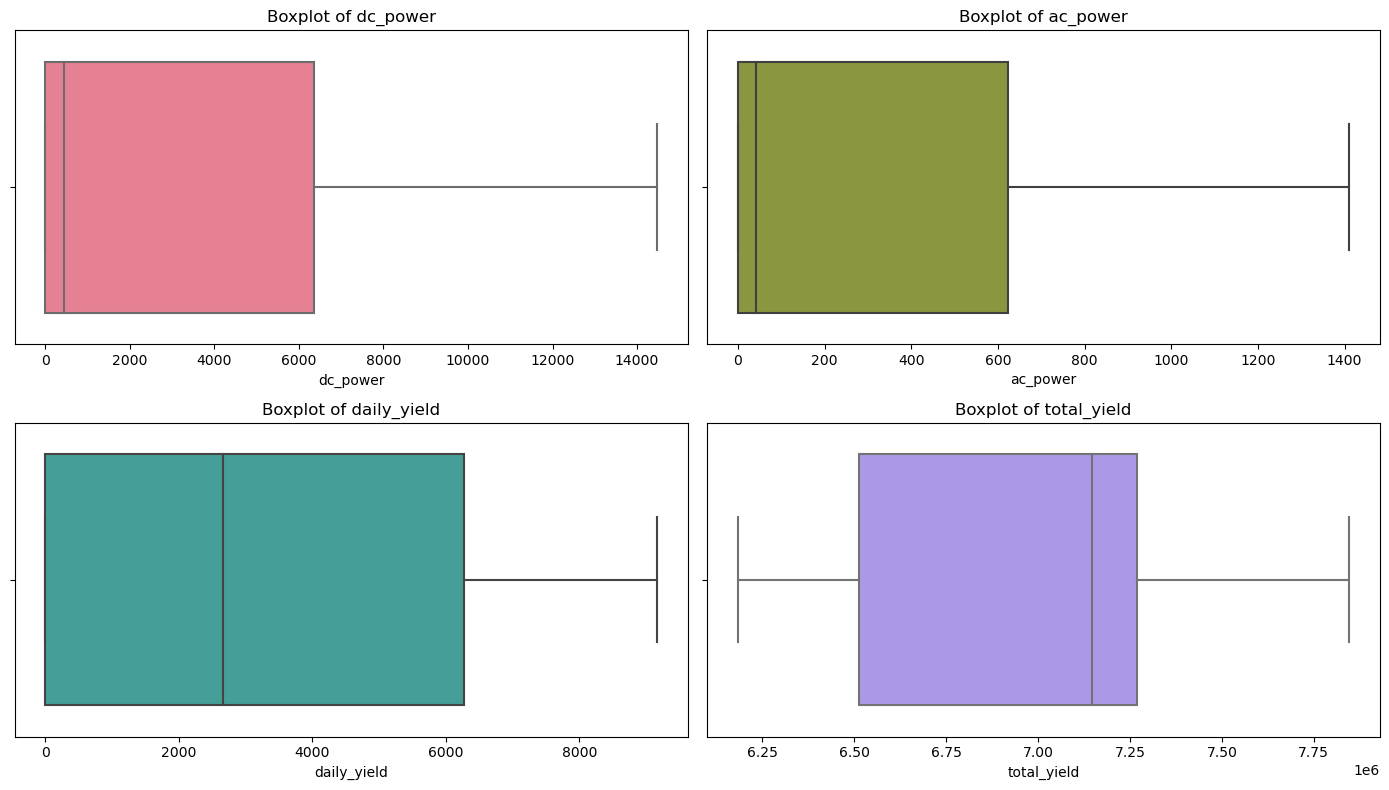

In [18]:
#box plots of the Plant 1 Generation Data
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,4 * 2))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check))

for ax, col, color in zip(axes, columns_to_check, colors):
    sns.boxplot(x=p1_gen_df[col], ax = ax, color= color)
    ax.set_title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

looking at the plots, it appears that no visible outliers are present

<h2>Data Visualization </h2>

In this section we will make several plots that will help us to better understand the data, we will try to extract information from them that will be useful in achieving the goals of the project and the implementation of the predictive models

<h3>DC_power & AC_power</h3>

In [19]:
def daily_dc_ac_distribution():
    copy_df = p1_gen_df.copy()
    copy_df['date_time'] = copy_df['date_time'].dt.strftime('%H:%M')
    mean_dc = copy_df.groupby('date_time')['dc_power'].mean().reset_index()
    mean_ac = copy_df.groupby('date_time')['ac_power'].mean().reset_index()
    plt.figure(figsize=(15, 7))
    sns.scatterplot(data=copy_df, x='date_time', y='dc_power', alpha=0.6, color='forestgreen', label='DC Power')
    sns.scatterplot(data=copy_df, x='date_time', y='ac_power', alpha=0.6, color='orange', label='AC Power')
    plt.plot(mean_dc['date_time'], mean_dc['dc_power'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean DC Power')
    plt.plot(mean_ac['date_time'], mean_ac['ac_power'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean AC Power')
    plt.title('Daily DC and AC Power Distribution')
    plt.xticks(rotation=90)
    plt.legend()
    plt.tight_layout()
    plt.grid(False)
    plt.show()

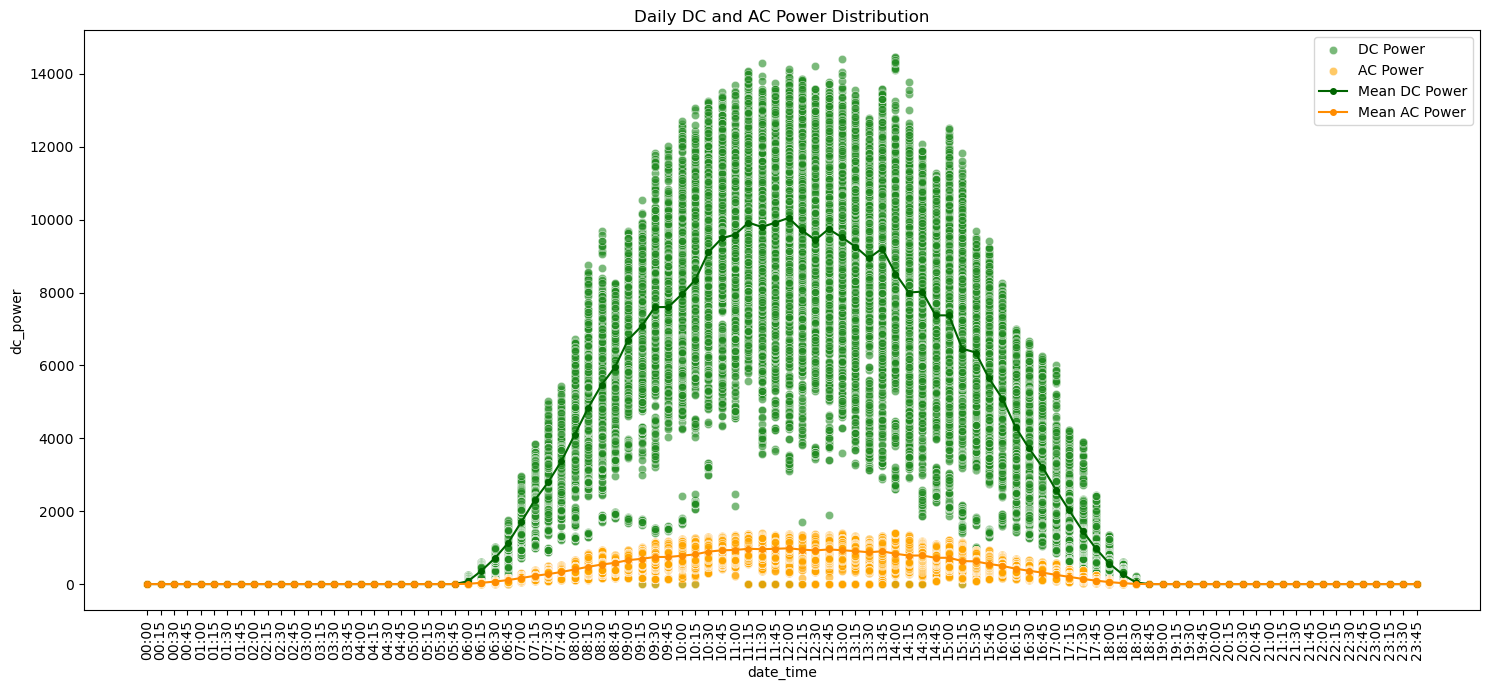

In [20]:
daily_dc_ac_distribution()

This graph allows us to visualize the distribution of dc_power and ac_power produced daily. Recall that the dc_power represents the amount of solar energy that has been collected by the panel and converted to direct current, while the ac_power represents the direct current that the inverter has converted to alternate_current to allow it to be used and transported. As can be seen from the daily distribution, the current is produced from 5:45 am until approximately 6:45 pm, which is during the times when the panels are subject to sunlight.

<h3>Daily Yield </h3>

The daily yield represents the daily performance of the inverter specifically the amount of alternating energy it was able to convert, in the following plots we will try to understand its performance over the period under consideration

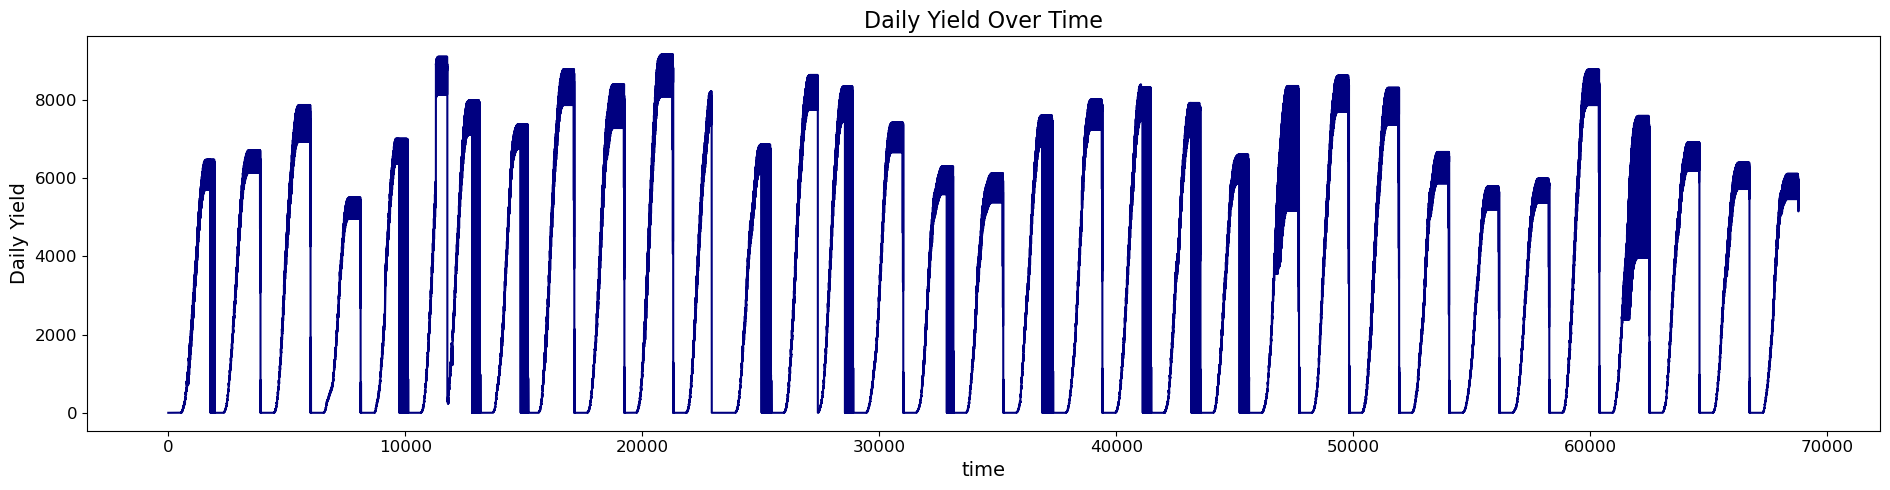

In [21]:
#plotting the daily yield over time
plt.figure(figsize=(19, 5))
p1_gen_df['daily_yield'].plot(color='navy')
plt.title('Daily Yield Over Time', fontsize=16)
plt.xlabel('time', fontsize=14)  
plt.ylabel('Daily Yield', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.grid(False)
plt.show()

The daily yield represents the amount of ac_power produced, it represents a cumulative sum for each day, this explains the shape of the graph made by high and low peaks. In fact, as we could see from the previous graph in which we analyzed the relationship between dc_power and ac_power, energy is produced only at certain times of day (those when the sun is present). So we can see the bases of the peaks remaining at zero for some time

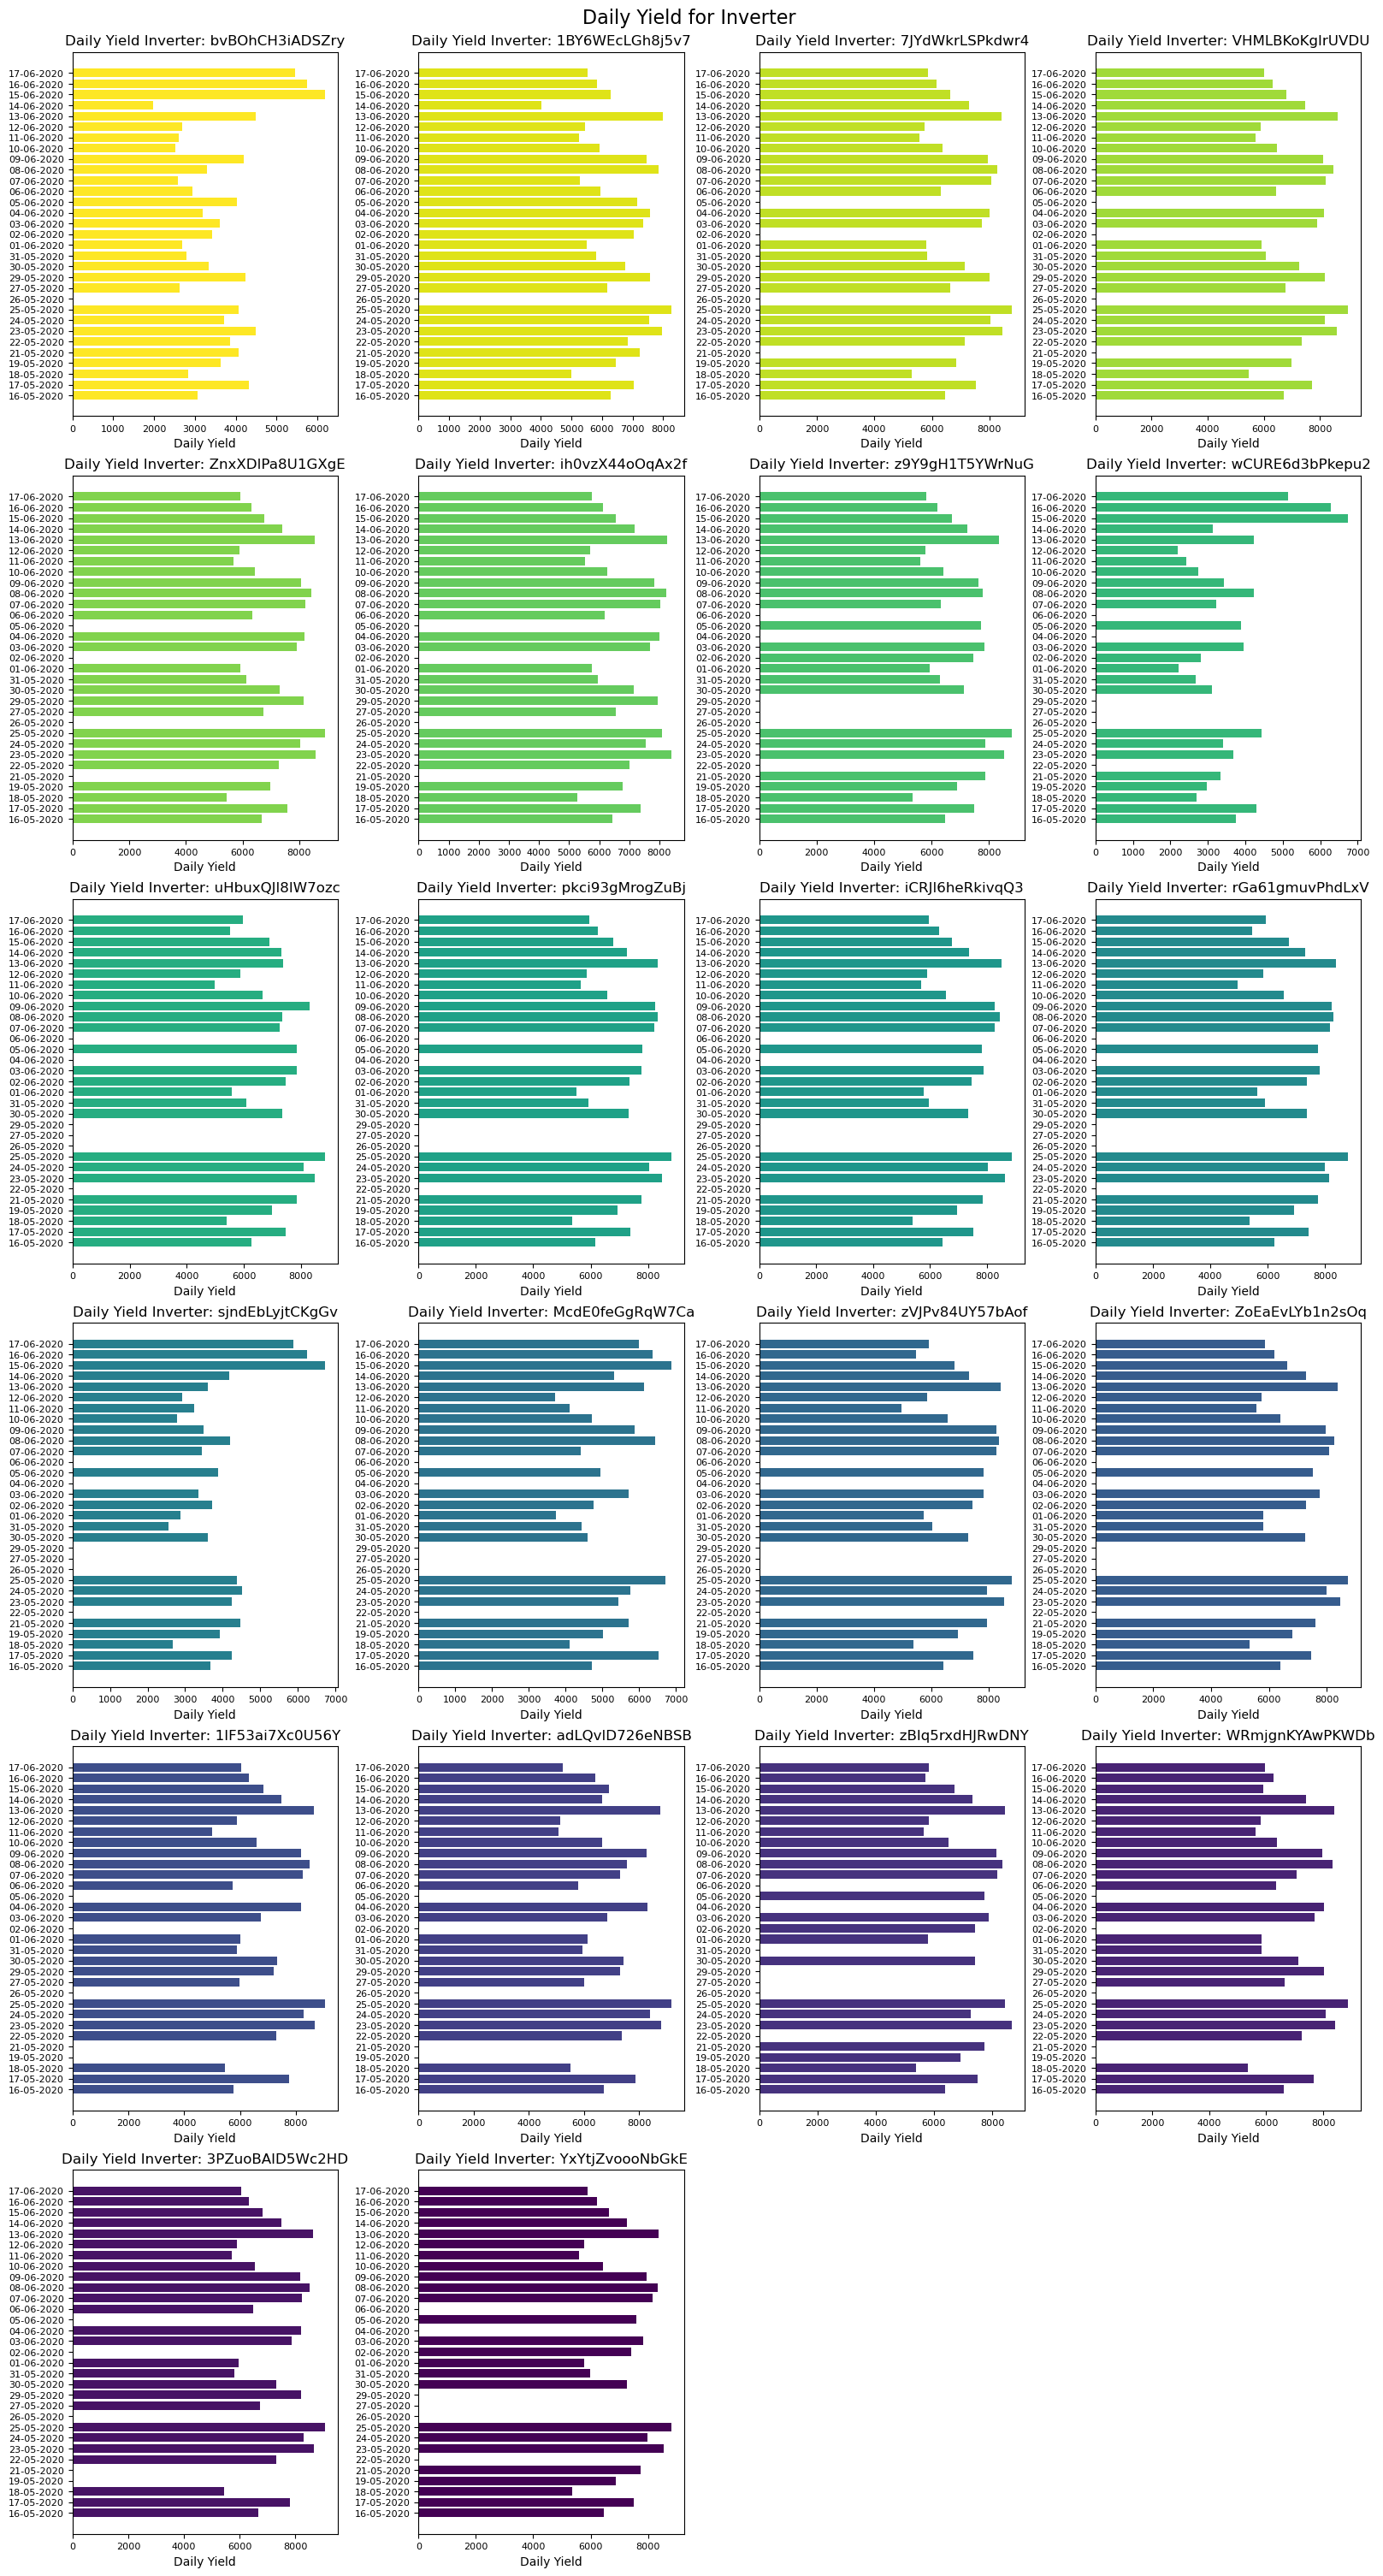

In [22]:
#plotting the daily yiled of each inverter for all the days
num_inverters = len(p1_invertes)
num_cols = 4
num_rows = (num_inverters + num_cols - 1) // num_cols  
fig, axs = plt.subplots(num_rows, num_cols, figsize=(16, 5 * num_rows), constrained_layout=True)
axs = axs.flatten()
colors = plt.cm.viridis_r(np.linspace(0, 1, num_inverters))
for idx, i in enumerate(p1_invertes):
    daily_yield = p1_gen_df[p1_gen_df['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    invert_dy = daily_yield[daily_yield['source_key'] == i]
    axs[idx].barh(invert_dy['date_time'].dt.strftime('%d-%m-%Y'), invert_dy['daily_yield'], color=colors[idx])
    axs[idx].set_title(f'Daily Yield Inverter: {i}', fontsize=12)
    axs[idx].set_xlabel('Daily Yield', fontsize=10)
    axs[idx].tick_params(axis='both', which='major', labelsize=8)
for ax in axs[num_inverters:]:
    fig.delaxes(ax)
plt.suptitle('Daily Yield for Inverter', fontsize=16)
plt.subplots_adjust(top=0.95)
plt.grid(False)
plt.show()


With this plots which represent the daily yield per day for each inverter, so there are some days for which the inverters do not produce energy. In particular here we can notice that the performance of the inverters are differents, so some of them have more days without production than others. In order to undestand the reason for that and eventualy sub ottimal performance, we can take a deep look about the daily yield distribution.

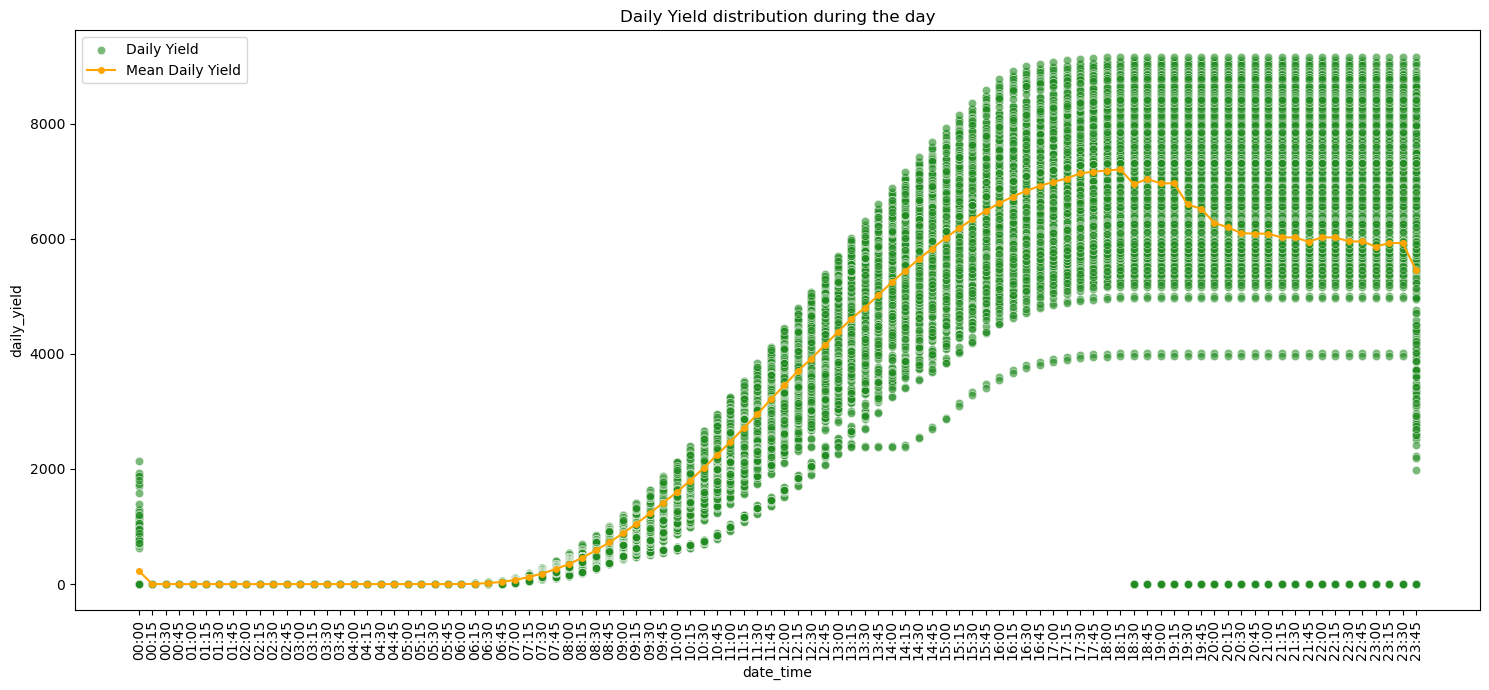

In [23]:
#plotting the daily yield over the hours of the day for each inverter in each day
plot_copy = p1_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

Representing the distribution of daily yield during the day, we can see an interesting thing. Namely, that for some inverters there is a daily yield measurement at 0:00 am which is an anomaly since the energy as we could see earlier starts to be produced only from 5:30 am. Let us therefore correct this anomaly in the measurements by making 0.00 such daily yield values. We can easily notice another problem. The dots of the daily yield which lay on the value 0 only after the 18.30 are anomalies. Thanks to that error some days appears without production but actually they produced until 18.30 but after that they stopped, this doesn't mean that the daily yield for that day should be 0.00. We will adjust also this data of the daily yield with the last availble value for that specific day. (this doesn't affect the distribution of the energy produced of that day)

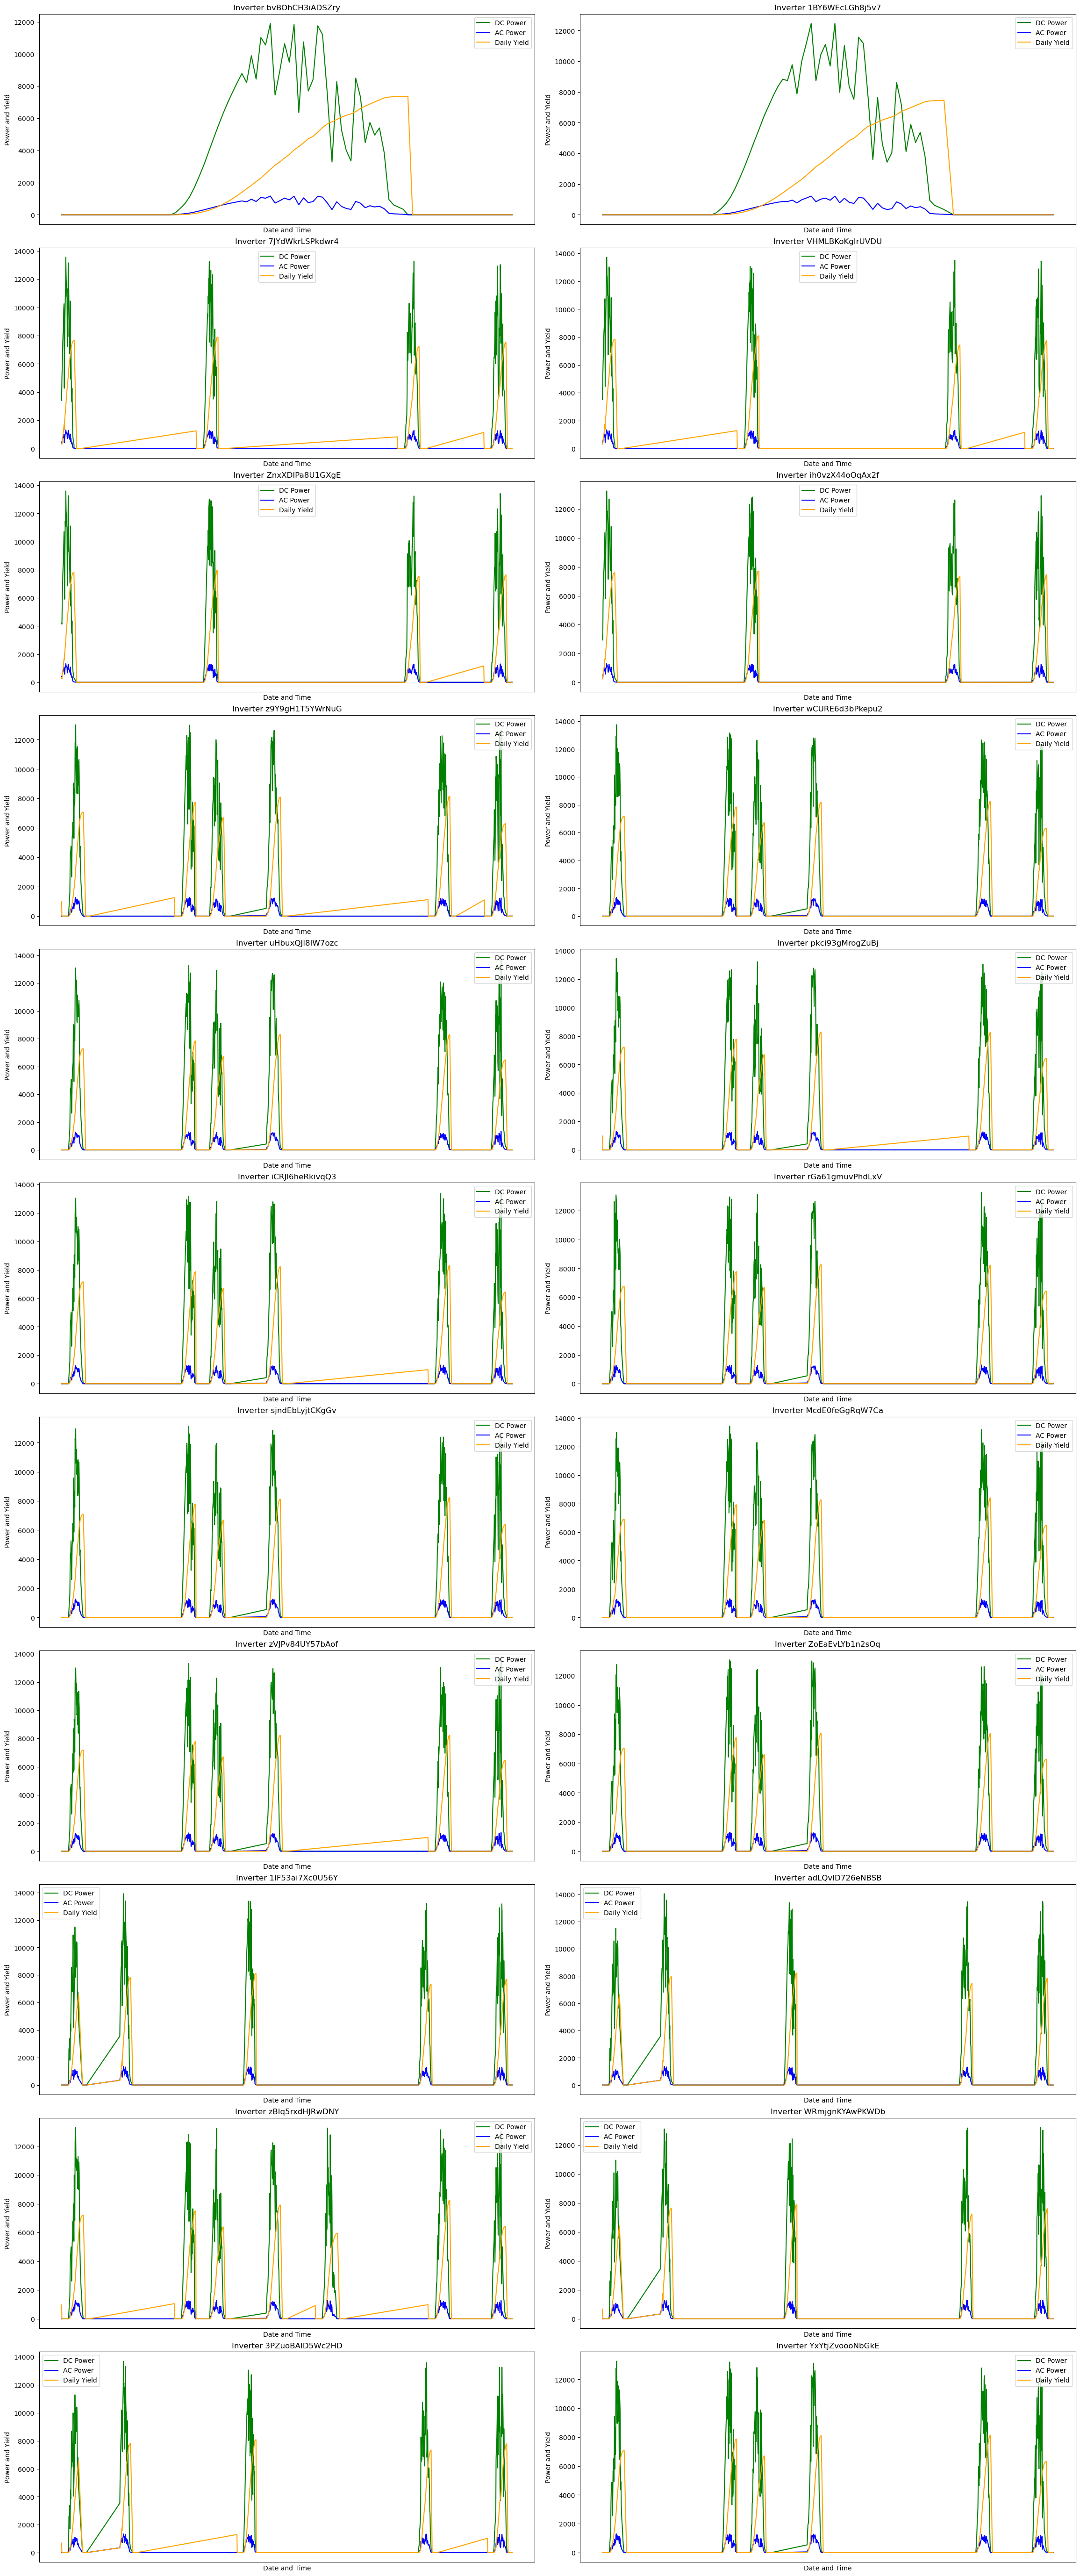

In [24]:
#plotting the daily yield, ac_power, dc_power for each inverter over the days for which the production of energy should
#be 0

df_test = p1_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

This graph represents the daily yield, ac and dc power for each inverter on days that appear with a daily yield of 0. It is easy to see that some days have the anomalies identified above. In indeed if the measurements were correct these graphs should be flat and show no peaks. Instead as we can see these peaks are due to the fact that at some point in the day a measurement error brings the daily yield to zero representing that day as non-productive. We will then go on to correct these daily yield values with the latest measurement available for that day

<h3>Inverters</h3>

In [25]:
p1_gen_df.columns

Index(['date_time', 'plant_id', 'source_key', 'dc_power', 'ac_power',
       'daily_yield', 'total_yield'],
      dtype='object')

In [26]:
Total_ac_P1 = p1_gen_df.groupby(['source_key'])['ac_power'].sum().reset_index()
Total_ac_P2 = p2_gen_df.groupby(['source_key'])['ac_power'].sum().reset_index()

In [27]:
Total_dc_P1 = p1_gen_df.groupby(['source_key'])['dc_power'].sum().reset_index()
Total_dc_P2 = p2_gen_df.groupby(['source_key'])['dc_power'].sum().reset_index()

In [28]:
Total_dcac_P1 = pd.merge(Total_dc_P1,Total_ac_P1, on=['source_key'], how='inner')
Total_dcac_P2 = pd.merge(Total_dc_P2,Total_ac_P2, on=['source_key'], how='inner')

In [29]:
Total_dcac_P1['AC/DC'] = (Total_ac_P1['ac_power'] / Total_dc_P1['dc_power'])*100
Total_dcac_P2['AC/DC'] = (Total_ac_P2['ac_power'] / Total_dc_P2['dc_power'])*100

In [30]:
print(f"Efficency of inverters in Plant1:\n {Total_dcac_P1}")

Efficency of inverters in Plant1:
          source_key      dc_power       ac_power     AC/DC
0   1BY6WEcLGh8j5v7  9.063716e+06  886665.326069  9.782581
1   1IF53ai7Xc0U56Y  1.006294e+07  984007.153452  9.778521
2   3PZuoBAID5Wc2HD  1.004313e+07  982068.208928  9.778510
3   7JYdWkrLSPkdwr4  9.815350e+06  959906.307338  9.779644
4   McdE0feGgRqW7Ca  1.003212e+07  981080.708217  9.779392
5   VHMLBKoKgIrUVDU  1.005725e+07  983449.000642  9.778507
6   WRmjgnKYAwPKWDb  9.838489e+06  962138.298813  9.779330
7   YxYtjZvoooNbGkE  9.869145e+06  965127.756186  9.779244
8   ZnxXDlPa8U1GXgE  9.997405e+06  977644.316190  9.778981
9   ZoEaEvLYb1n2sOq  9.803128e+06  958700.484522  9.779537
10  adLQvlD726eNBSB  1.019778e+07  997125.156663  9.777863
11  bvBOhCH3iADSZry  8.925490e+06  873237.550835  9.783638
12  iCRJl6heRkivqQ3  9.987733e+06  976688.499523  9.778880
13  ih0vzX44oOqAx2f  9.695845e+06  948272.430359  9.780193
14  pkci93gMrogZuBj  9.895623e+06  967719.414521  9.779267
15  rGa61gmuvPhdLxV  

In [31]:
print(f"Efficency of inverters in Plant2:\n {Total_dcac_P2}")
##Et9kgGMDl729KT4, Quc1TzYxW2pYoWX, LYwnQax7tkwH5Cb receive little incoming DC despite having a high number of observations.
#While mqwcsP2rE7J0TFp, NgDl19wMapZy17u, IQ2d7wF4YD8zU1Q, xMbIugepa2P7lBB the value is justified by having almost 800 fewer observations

Efficency of inverters in Plant2:
          source_key       dc_power       ac_power      AC/DC
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197 

In [32]:
observations_count1 = p1_gen_df['source_key'].value_counts().reset_index()
observations_count1.columns = ['source_key', 'Count']

# Merge the observation count with the Total_dcac_P1 dataframe
Total_dcac_P1 = pd.merge(Total_dcac_P1, observations_count1, on='source_key', how='inner')
# Normalize the DC_POWER by the number of observations
Total_dcac_P1['dc_power_normalized'] = Total_dcac_P1['dc_power'] / Total_dcac_P1['Count']

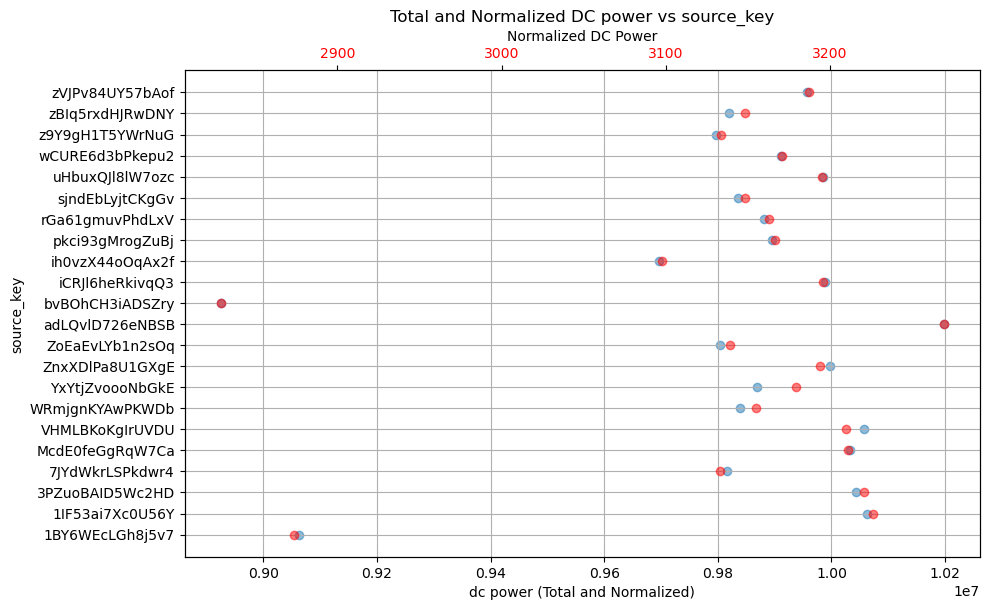

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for total DC power
ax1.set_xlabel('dc power (Total and Normalized)')
ax1.set_ylabel('source_key')
ax1.scatter(Total_dcac_P1['dc_power'], Total_dcac_P1['source_key'], alpha=0.5)
ax1.tick_params(axis='y')
ax1.grid(True)

# Create a second axis sharing the same y-axis
ax2 = ax1.twiny()

# Plot for normalized DC power
ax2.set_xlabel('Normalized DC Power')
ax2.scatter(Total_dcac_P1['dc_power_normalized'], Total_dcac_P1['source_key'], alpha=0.5, color='red')
ax2.tick_params(axis='x', labelcolor='red')

fig.tight_layout()
plt.title('Total and Normalized DC power vs source_key')
plt.show()



In [34]:
Total_dcac_P1

source_key      dc_power       ac_power     AC/DC  Count  \
0   1BY6WEcLGh8j5v7  9.063716e+06  886665.326069  9.782581   3154   
1   1IF53ai7Xc0U56Y  1.006294e+07  984007.153452  9.778521   3119   
2   3PZuoBAID5Wc2HD  1.004313e+07  982068.208928  9.778510   3118   
3   7JYdWkrLSPkdwr4  9.815350e+06  959906.307338  9.779644   3133   
4   McdE0feGgRqW7Ca  1.003212e+07  981080.708217  9.779392   3124   
5   VHMLBKoKgIrUVDU  1.005725e+07  983449.000642  9.778507   3133   
6   WRmjgnKYAwPKWDb  9.838489e+06  962138.298813  9.779330   3118   
7   YxYtjZvoooNbGkE  9.869145e+06  965127.756186  9.779244   3104   
8   ZnxXDlPa8U1GXgE  9.997405e+06  977644.316190  9.778981   3130   
9   ZoEaEvLYb1n2sOq  9.803128e+06  958700.484522  9.779537   3123   
10  adLQvlD726eNBSB  1.019778e+07  997125.156663  9.777863   3119   
11  bvBOhCH3iADSZry  8.925490e+06  873237.550835  9.783638   3155   
12  iCRJl6heRkivqQ3  9.987733e+06  976688.499523  9.778880   3125   
13  ih0vzX44oOqAx2f  9.695845e+06  948272.430359  9.780193   3130   
14  pkci93gMrogZuBj  9.895623e+06  967719.414521  9.779267   3125   
15  rGa61gmuvPhdLxV  9.881965e+06  966395.835123  9.779390   3124   
16  sjndEbLyjtCKgGv  9.835197e+06  961917.916550  9.780363   3124   
17  uHbuxQJl8lW7ozc  9.985363e+06  976462.011390  9.778934   3125   
18  wCURE6d3bPkepu2  9.911622e+06  969260.200356  9.779027   3126   
19  z9Y9gH1T5YWrNuG  9.797002e+06  958094.071906  9.779462   3126   
20  zBIq5rxdHJRwDNY  9.820452e+06  960419.146543  9.779785   3119   
21  zVJPv84UY57bAof  9.956927e+06  973677.901192  9.778899   3124   

    dc_power_normalized  
0           2873.720981  
1           3226.336768  
2           3221.015673  
3           3132.891955  
4           3211.307245  
5           3210.102563  
6           3155.384433  
7           3179.492570  
8           3194.059104  
9           3139.009808  
10          3269.567669  
11          2828.998291  
12          3196.074675  
13          3097.714161  
14          3166.599439  
15          3163.240929  
16          3148.270450  
17          3195.316080  
18          3170.704424  
19          3134.037738  
20          3148.590013  
21          3187.236622

In [35]:
Total_dcac_P1['dc_power_normalized'].sort_values()

11    2828.998291
0     2873.720981
13    3097.714161
3     3132.891955
19    3134.037738
9     3139.009808
16    3148.270450
20    3148.590013
6     3155.384433
15    3163.240929
14    3166.599439
18    3170.704424
7     3179.492570
21    3187.236622
8     3194.059104
17    3195.316080
12    3196.074675
5     3210.102563
4     3211.307245
2     3221.015673
1     3226.336768
10    3269.567669
Name: dc_power_normalized, dtype: float64

In [36]:
observations_count2 = p2_gen_df['source_key'].value_counts().reset_index()
observations_count2.columns = ['source_key', 'Count']

# Merge the observation count with the Total_dcac_P1 dataframe
Total_dcac_P2 = pd.merge(Total_dcac_P2, observations_count2, on='source_key', how='inner')
# Normalize the DC_POWER by the number of observations
Total_dcac_P2['dc_power_normalized'] = Total_dcac_P2['dc_power'] / Total_dcac_P2['Count']


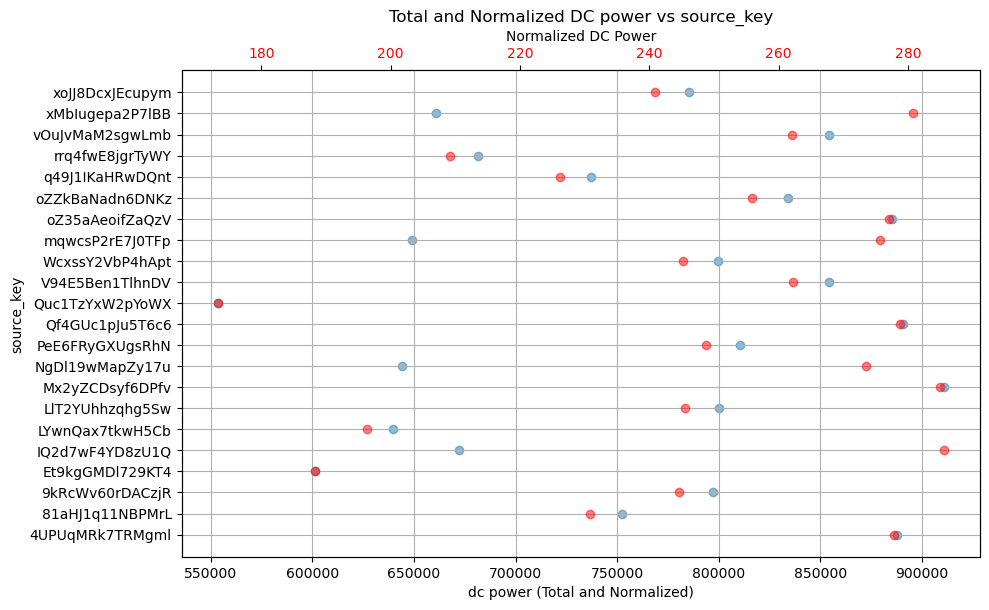

In [37]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot for total DC power
ax1.set_xlabel('dc power (Total and Normalized)')
ax1.set_ylabel('source_key')
ax1.scatter(Total_dcac_P2['dc_power'], Total_dcac_P2['source_key'], alpha=0.5)
ax1.tick_params(axis='y')
ax1.grid(True)

# Create a second axis sharing the same y-axis
ax2 = ax1.twiny()

# Plot for normalized DC power
ax2.set_xlabel('Normalized DC Power')
ax2.scatter(Total_dcac_P2['dc_power_normalized'], Total_dcac_P2['source_key'], alpha=0.5, color='red')
ax2.tick_params(axis='x', labelcolor='red')

fig.tight_layout()
plt.title('Total and Normalized DC power vs source_key')
plt.show()

In [38]:
Total_dcac_P2

source_key       dc_power       ac_power      AC/DC  Count  \
0   4UPUqMRk7TRMgml  887444.875348  867688.151550  97.773752   3195   
1   81aHJ1q11NBPMrL  752165.196310  735648.671081  97.804136   3259   
2   9kRcWv60rDACzjR  797324.213511  779819.329933  97.804546   3259   
3   Et9kgGMDl729KT4  601396.050982  588615.708104  97.874887   3195   
4   IQ2d7wF4YD8zU1Q  672411.639080  657492.579189  97.781261   2355   
5   LYwnQax7tkwH5Cb  639696.326687  626022.753183  97.862490   3259   
6   LlT2YUhhzqhg5Sw  800062.652611  782521.577770  97.807537   3259   
7   Mx2yZCDsyf6DPfv  910617.270808  890317.270321  97.770743   3195   
8   NgDl19wMapZy17u  644144.508733  629927.405301  97.792871   2355   
9   PeE6FRyGXUgsRhN  810478.778457  792664.868701  97.802051   3259   
10  Qf4GUc1pJu5T6c6  890596.324322  870755.655462  97.772204   3195   
11  Quc1TzYxW2pYoWX  553548.858901  542014.929794  97.916367   3195   
12  V94E5Ben1TlhnDV  854375.668930  835443.639984  97.784110   3259   
13  WcxssY2VbP4hApt  799350.243035  781608.549098  97.780486   3259   
14  mqwcsP2rE7J0TFp  649276.918105  634944.647197  97.792580   2355   
15  oZ35aAeoifZaQzV  885151.874261  865435.791964  97.772576   3195   
16  oZZkBaNadn6DNKz  834046.999676  815637.897502  97.792798   3259   
17  q49J1IKaHRwDQnt  737061.896822  721060.844115  97.829076   3259   
18  rrq4fwE8jgrTyWY  681647.365682  667002.354956  97.851527   3259   
19  vOuJvMaM2sgwLmb  854172.894243  835012.155241  97.756808   3259   
20  xMbIugepa2P7lBB  661077.859235  646458.728993  97.788592   2355   
21  xoJJ8DcxJEcupym  785180.932443  767932.701010  97.803279   3259   

    dc_power_normalized  
0            277.760524  
1            230.796317  
2            244.653027  
3            188.230376  
4            285.525112  
5            196.286078  
6            245.493296  
7            285.013230  
8            273.522084  
9            248.689407  
10           278.746893  
11           173.254729  
12           262.158843  
13           245.274699  
14           275.701451  
15           277.042840  
16           255.921141  
17           226.161981  
18           209.158443  
19           262.096623  
20           280.712467  
21           240.926951

In [39]:
Total_dcac_P2['dc_power_normalized'].sort_values()

11    173.254729
3     188.230376
5     196.286078
18    209.158443
17    226.161981
1     230.796317
21    240.926951
2     244.653027
13    245.274699
6     245.493296
9     248.689407
16    255.921141
19    262.096623
12    262.158843
8     273.522084
14    275.701451
15    277.042840
0     277.760524
10    278.746893
20    280.712467
7     285.013230
4     285.525112
Name: dc_power_normalized, dtype: float64

<h3> Pannel Performance </h3>

<h3>Total Yield</h3>

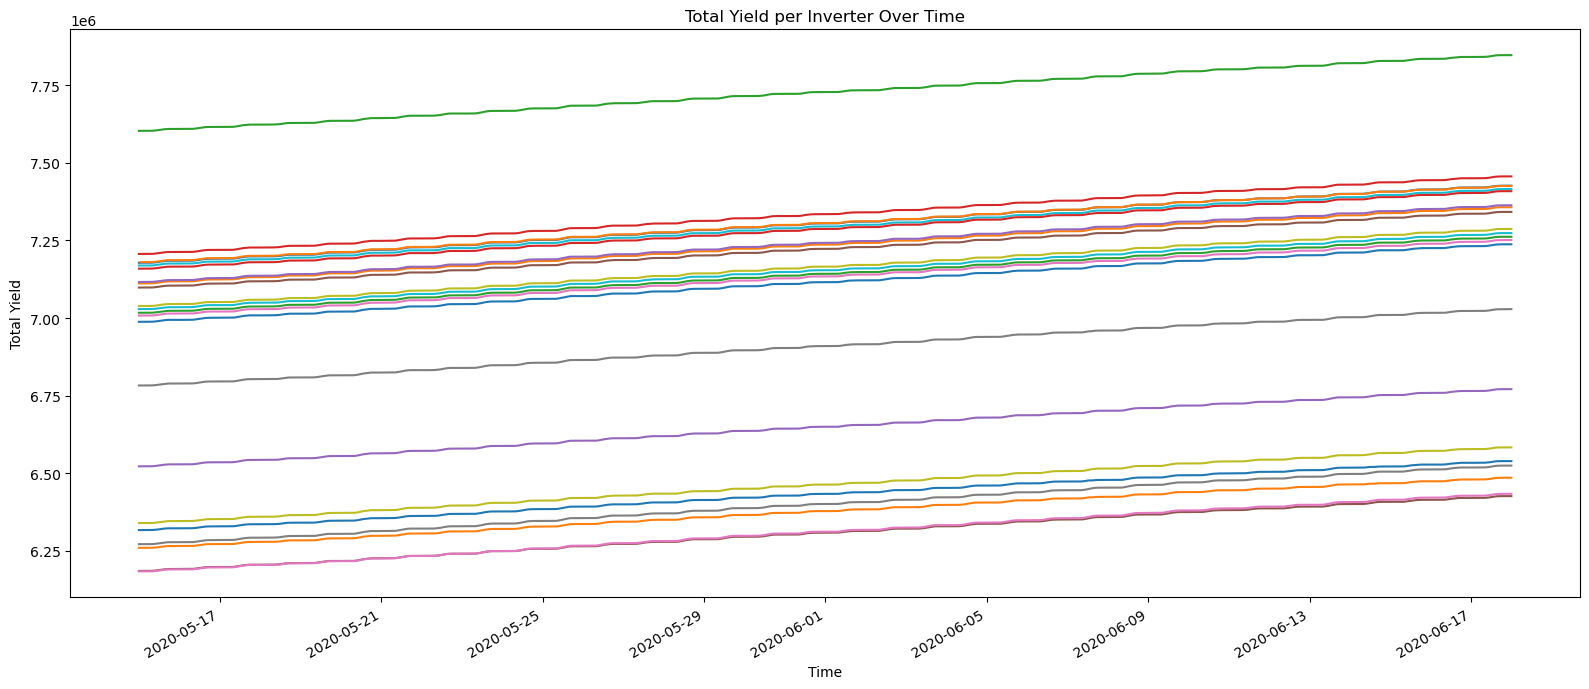

In [40]:
plt.figure(figsize=(16,7))
for i in p1_invertes:
    df = p1_gen_df[p1_gen_df['source_key'] == i]
    df.set_index('date_time')['total_yield'].plot()
plt.xlabel('Time')
plt.ylabel('Total Yield')
plt.title('Total Yield per Inverter Over Time')
plt.tight_layout()
plt.grid(False)
plt.show()

<h2> EDA Weather Plant 1</h2>

<h3>First Look </h3>

In [41]:
#first 5 rows of the weather data for plant 1
p1_wea_df.head(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe            24.846130   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe            24.621525   

   MODULE_TEMPERATURE  IRRADIATION  
0           22.857507          0.0  
1           22.761668          0.0  
2           22.592306          0.0  
3           22.360852          0.0  
4           22.165423          0.0

<h3>Shape and Size</h3>

In [42]:
# shape and size of the weather dataset
p1_wea_shape = p1_wea_df.shape
p1_wea_size = p1_wea_df.size
print(f'The Weather Data for the plant 1 is composed by: {p1_wea_shape[0]} rows and {p1_wea_shape[1]} columns.\nFor a total of {p1_wea_size} values')

The Weather Data for the plant 1 is composed by: 3182 rows and 6 columns.
For a total of 19092 values


<h3>Dataframe Info</h3>

In [43]:
#information about the Weather Data for the plant 1
p1_wea_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


<h3>Missing Data </h3>

In [44]:
#to be sure, we can still check for null values
p1_wea_df.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

we don't have missing data.

<h3>Statistics Summary</h3>

In [45]:
#statistics description of the generation data for the plant 1
p1_wea_df.describe().T

count          mean        std           min  \
PLANT_ID             3182.0  4.135001e+06   0.000000  4.135001e+06   
AMBIENT_TEMPERATURE  3182.0  2.553161e+01   3.354856  2.039850e+01   
MODULE_TEMPERATURE   3182.0  3.109102e+01  12.261222  1.814042e+01   
IRRADIATION          3182.0  2.283128e-01   0.300836  0.000000e+00   

                              25%           50%           75%           max  
PLANT_ID             4.135001e+06  4.135001e+06  4.135001e+06  4.135001e+06  
AMBIENT_TEMPERATURE  2.270518e+01  2.461381e+01  2.792053e+01  3.525249e+01  
MODULE_TEMPERATURE   2.109055e+01  2.461806e+01  4.130784e+01  6.554571e+01  
IRRADIATION          0.000000e+00  2.465348e-02  4.495884e-01  1.221652e+00

<h3>Column Names</h3>

In [46]:
#adjusting the name of the columns in order to make it easier to work with
p1_wea_df.columns = list(map(lambda x : x.lower(),p1_wea_df.columns))
p1_wea_df.columns

Index(['date_time', 'plant_id', 'source_key', 'ambient_temperature',
       'module_temperature', 'irradiation'],
      dtype='object')

In [47]:
#formatting the date_time column in format: datetime
p1_wea_df['date_time'] = pd.to_datetime(p1_wea_df['date_time'], format='%Y-%m-%d %H:%M:%S')

In [48]:
#extract all the days that are observed in our dataset
def days_analyzed():
    copy1 = p1_wea_df.copy()
    copy1['day_month_year'] = copy1['date_time'].dt.strftime('%d-%m-%Y')
    date_list = []
    for i in copy1['day_month_year']:
        if i not in date_list:
            date_list.append(i)
    return date_list
days_analyzed()

['15-05-2020',
 '16-05-2020',
 '17-05-2020',
 '18-05-2020',
 '19-05-2020',
 '20-05-2020',
 '21-05-2020',
 '22-05-2020',
 '23-05-2020',
 '24-05-2020',
 '25-05-2020',
 '26-05-2020',
 '27-05-2020',
 '28-05-2020',
 '29-05-2020',
 '30-05-2020',
 '31-05-2020',
 '01-06-2020',
 '02-06-2020',
 '03-06-2020',
 '04-06-2020',
 '05-06-2020',
 '06-06-2020',
 '07-06-2020',
 '08-06-2020',
 '09-06-2020',
 '10-06-2020',
 '11-06-2020',
 '12-06-2020',
 '13-06-2020',
 '14-06-2020',
 '15-06-2020',
 '16-06-2020',
 '17-06-2020']

they are the same as the power generation dataset

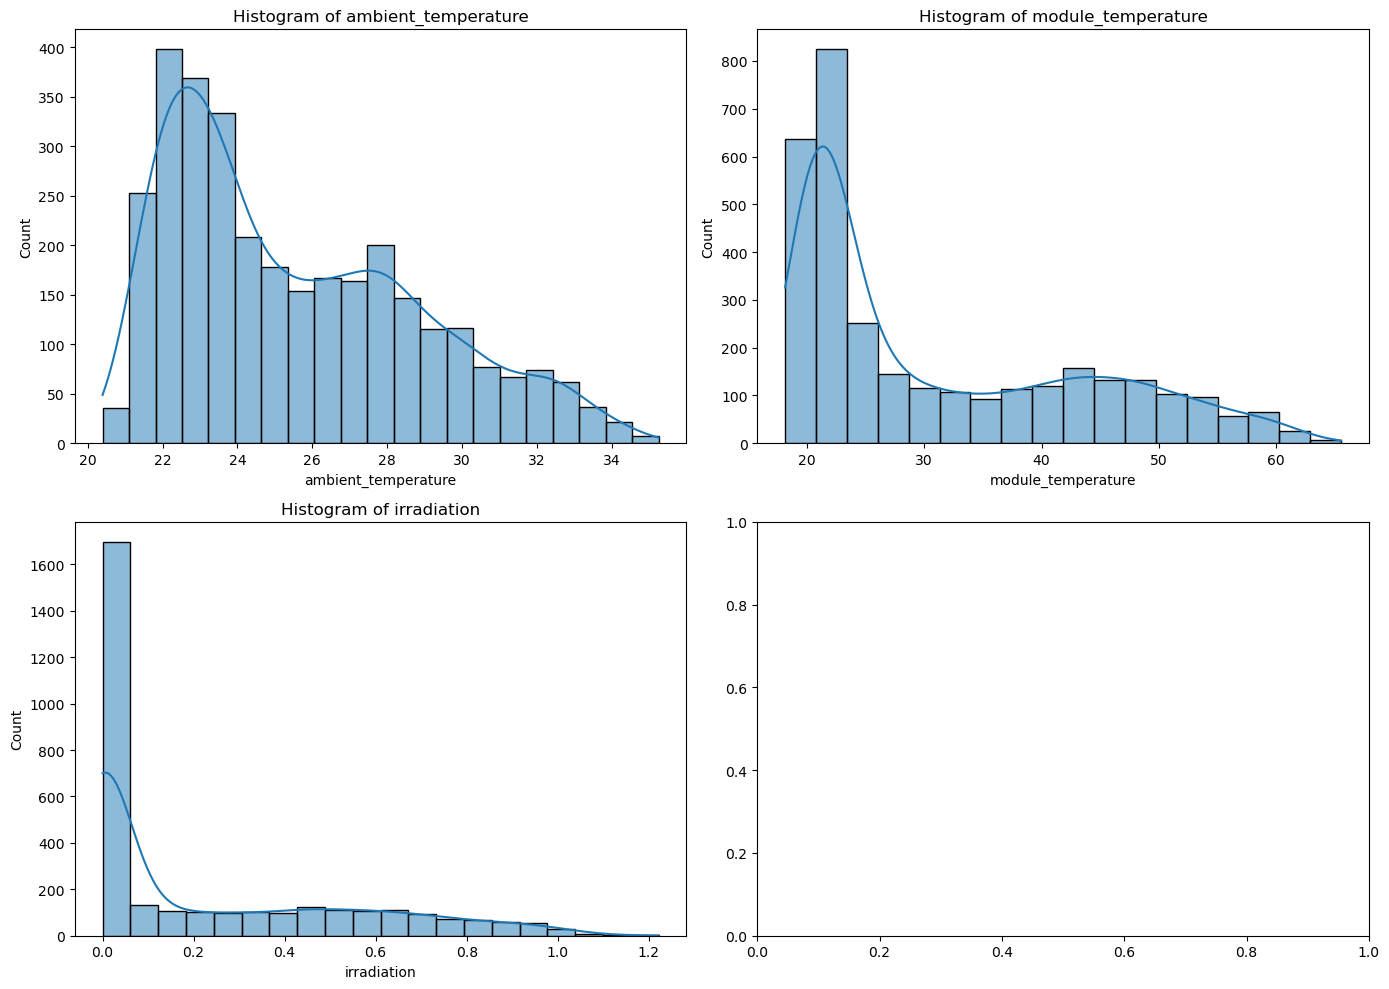

In [49]:
#creating the histograms for this columns
columns_to_check2 = ['ambient_temperature','module_temperature', 'irradiation']
num_col = len(columns_to_check2)
num_rows = (num_col // 2) + (num_col % 2)
#creating the subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(14,5 * num_rows))
axes = axes.flatten()
for ax, col in zip(axes, columns_to_check2):
    sns.histplot(p1_wea_df[col], kde=True, ax=ax)
    ax.set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

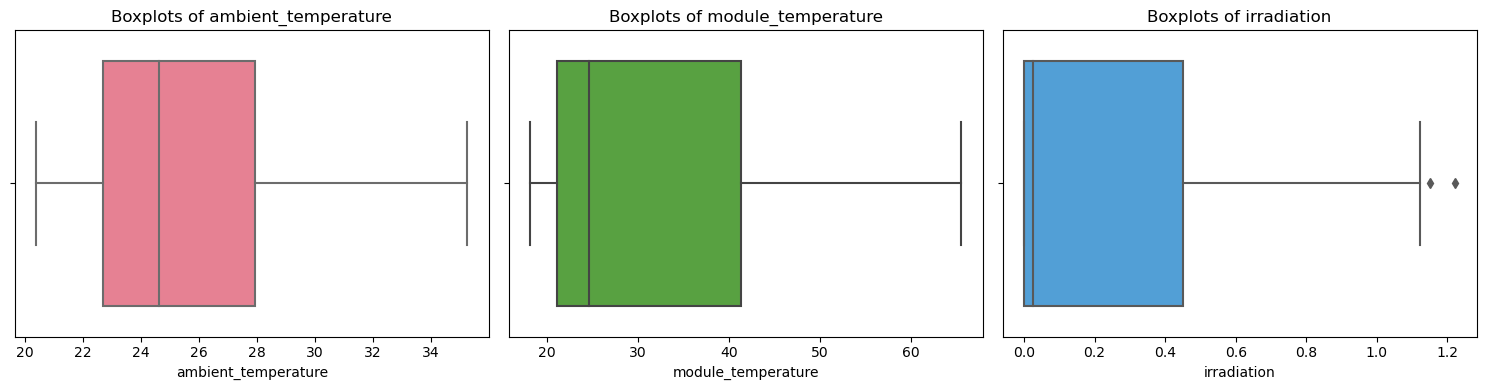

In [50]:
#box plots of the Weather Data plant 1
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,4))
axes = axes.flatten()
colors = sns.color_palette("husl", len(columns_to_check2))

for ax, col, color in zip(axes, columns_to_check2, colors):
    sns.boxplot(x=p1_wea_df[col], ax = ax, color= color)
    ax.set_title(f'Boxplots of {col}')
plt.tight_layout()
plt.show()

<h3>Outliers Weather Dataset</h3>

In [51]:
#function to check for outliers
def identify_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    num_outliers = outliers.shape[0]
    return outliers

In [52]:
identify_outliers(p1_wea_df,'irradiation')

date_time  plant_id       source_key  ambient_temperature  \
1407 2020-05-30 12:00:00   4135001  HmiyD2TTLFNqkNe            27.092855   
2854 2020-06-14 14:00:00   4135001  HmiyD2TTLFNqkNe            27.848916   

      module_temperature  irradiation  
1407           57.691178     1.151102  
2854           59.386079     1.221652

In [53]:
#removing the outliers
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

p1_wea_df = remove_outliers(p1_wea_df, 'irradiation')

<h3>Ambient Temperature and Module Temperature Over the day </h3>

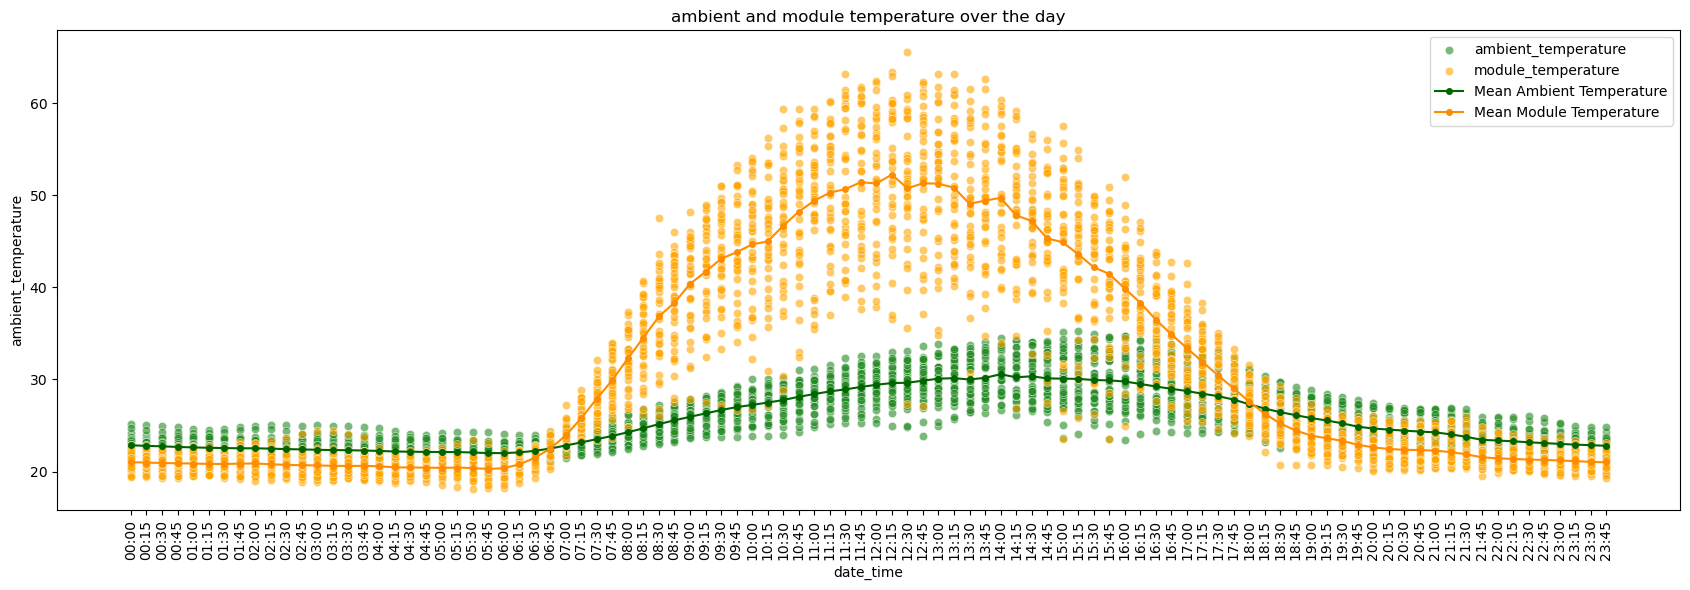

In [54]:
#plotting the temperature for over the hours of the day and the mean temperature
copy_weather = p1_wea_df.copy()
copy_weather['date_time'] = copy_weather['date_time'].dt.strftime('%H:%M')
mean_temp = copy_weather.groupby('date_time')['ambient_temperature'].mean().reset_index()
mean_mod = copy_weather.groupby('date_time')['module_temperature'].mean().reset_index()
plt.figure(figsize=(17,6))
sns.scatterplot(data=copy_weather, x='date_time', y='ambient_temperature', alpha=0.6, color='forestgreen', label='ambient_temperature')
sns.scatterplot(data=copy_weather, x='date_time', y='module_temperature', alpha=0.6, color='orange', label='module_temperature')
plt.plot(mean_temp['date_time'], mean_temp['ambient_temperature'], color='darkgreen', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Ambient Temperature')
plt.plot(mean_mod['date_time'], mean_mod['module_temperature'], color='darkorange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Module Temperature')
plt.title('ambient and module temperature over the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<h3>Irradiation</h3>

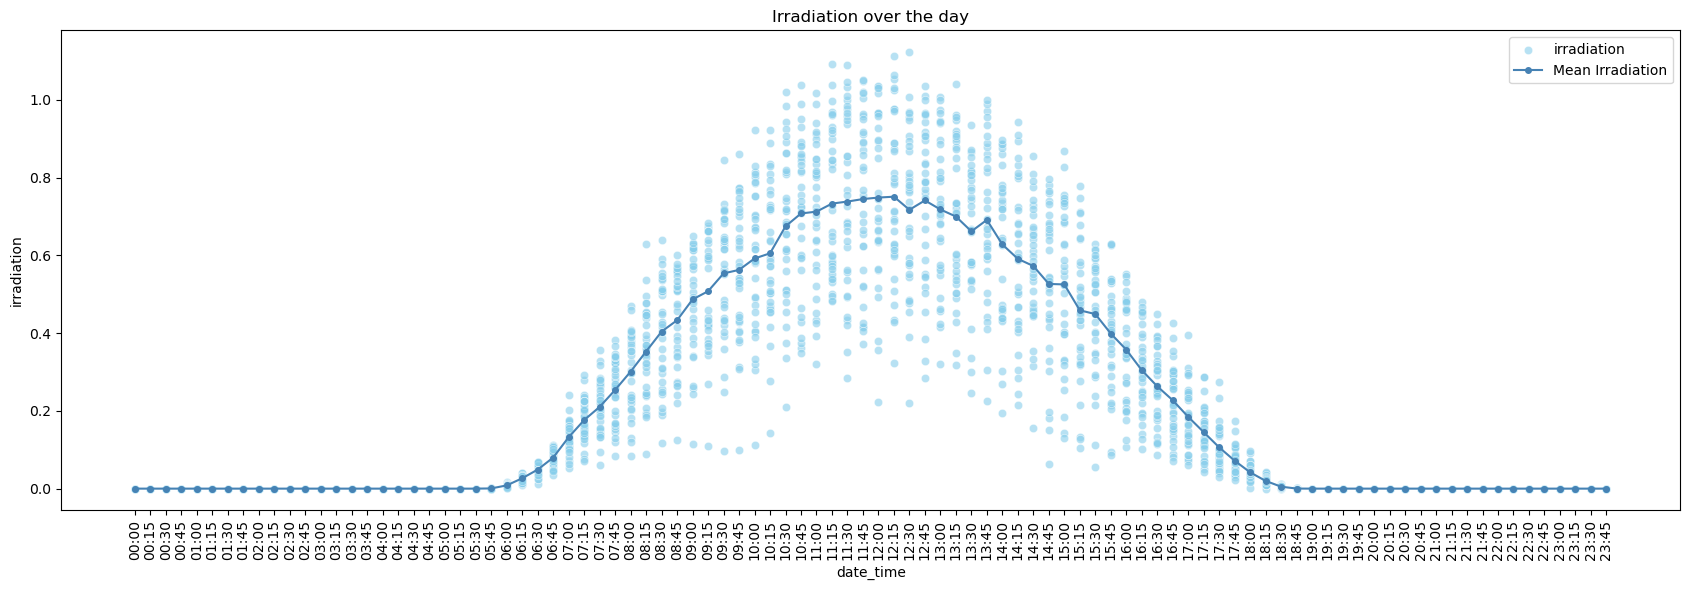

In [55]:
#plotting the irradiation during the day
mean_irr = copy_weather.groupby('date_time')['irradiation'].mean().reset_index()
plt.figure(figsize=(17,6))
sns.scatterplot(data=copy_weather, x='date_time', y='irradiation', alpha=0.6, color='skyblue', label='irradiation')
plt.plot(mean_irr['date_time'], mean_irr['irradiation'], color='steelblue', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Irradiation')
plt.title('Irradiation over the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()

<h2>Anomaly Corrections</h2>

In [56]:
p1_gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date_time    68778 non-null  datetime64[ns]
 1   plant_id     68778 non-null  int64         
 2   source_key   68778 non-null  object        
 3   dc_power     68778 non-null  float64       
 4   ac_power     68778 non-null  float64       
 5   daily_yield  68778 non-null  float64       
 6   total_yield  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB


In [57]:
#correct value of midnight
p1_gen_df['date_time_hours'] = p1_gen_df['date_time'].dt.strftime('%H:%M')
index_error = list(p1_gen_df[p1_gen_df['date_time_hours'] == '00:00'].index)
p1_gen_df.loc[index_error,'daily_yield'] = 0.0
p1_gen_df

date_time  plant_id       source_key  dc_power  ac_power  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       daily_yield  total_yield date_time_hours  
0            0.000    6259559.0           00:00  
1            0.000    6183645.0           00:00  
2            0.000    6987759.0           00:00  
3            0.000    7602960.0           00:00  
4            0.000    7158964.0           00:00  
...            ...          ...             ...  
68773     5967.000    7287002.0           23:45  
68774     5147.625    7028601.0           23:45  
68775     5819.000    7251204.0           23:45  
68776     5817.000    6583369.0           23:45  
68777     5910.000    7363272.0           23:45  

[68778 rows x 8 columns]

I correct the anomalies of the inverters that have a daily yield value until 6 p.m. and then it resets to zero, so I fill all the rows with the last available daily yield value, which I think was 6 or 6:30 p.m.

In [58]:
for i in p1_invertes:
    #inverter df 
    inverter_p1 = p1_gen_df[p1_gen_df['source_key'] == i]
    
    inverter_p1['date_time_hours'] = inverter_p1['date_time'].dt.strftime('%H:%M')
    #daily production
    daily_yield_total = inverter_p1[inverter_p1['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    #day with 0 production
    daily_yield_t = daily_yield_total[daily_yield_total['daily_yield'] == 0]
    
    daily_yield_t['date_only'] = daily_yield_t['date_time'].dt.strftime('%Y-%m-%d')
    date_list2 = daily_yield_t['date_only'].tolist()
    date_list_p1 = pd.to_datetime(date_list2)
    
    inverter_p1['date_only'] = inverter_p1['date_time'].dt.normalize()
    
    filtered_df2 = inverter_p1[inverter_p1['date_only'].isin(date_list_p1)]
    #days with no production
    days = filtered_df2['date_only'].unique()
    
    for j in days:
        spec_day = filtered_df2[filtered_df2['date_only'] == j]
        correct_value_for_inv = spec_day[spec_day['date_time_hours'] == '18:00']
        
        if not correct_value_for_inv.empty:
            correct_value = correct_value_for_inv['daily_yield'].iloc[0]
            rows_to_change = spec_day[spec_day['date_time_hours'] > '18:00'].index
            p1_gen_df.loc[rows_to_change, 'daily_yield'] = correct_value

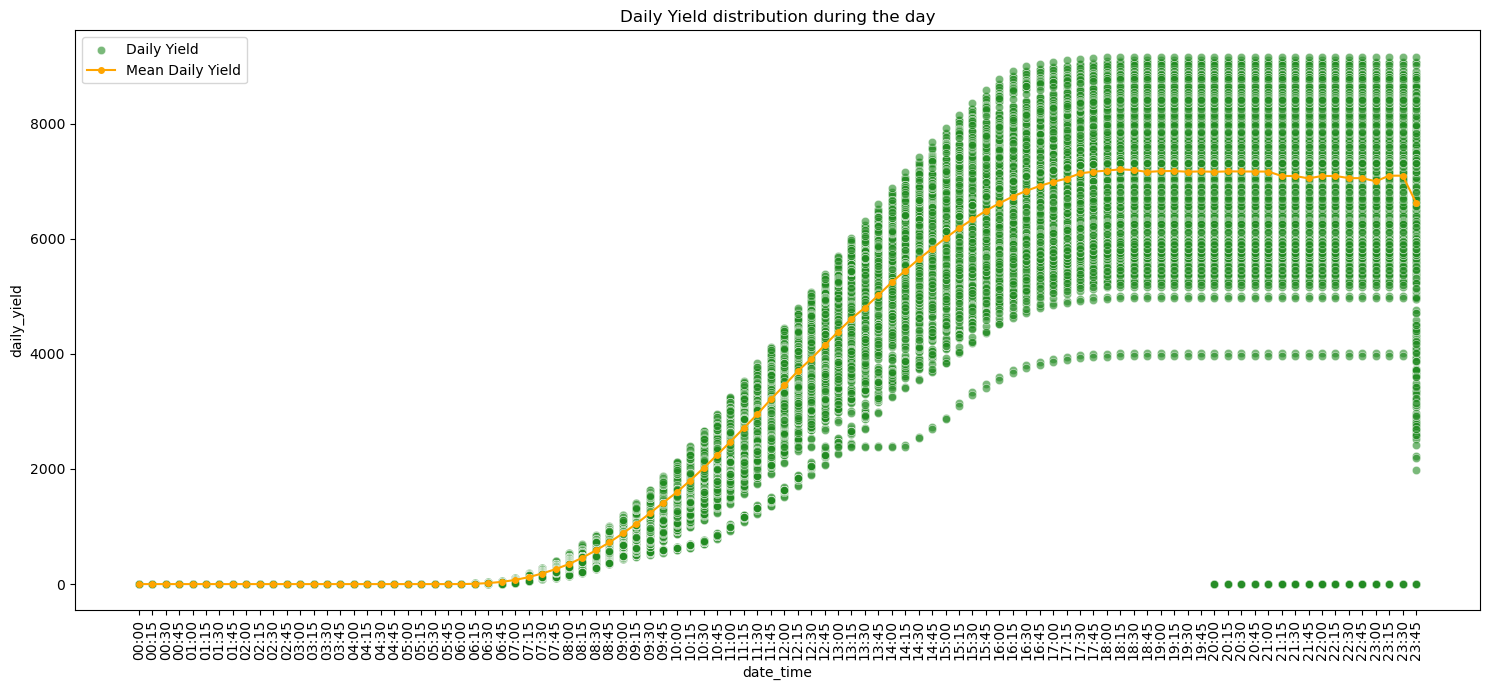

In [59]:
copy_gen_df = p1_gen_df
plot_copy = copy_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

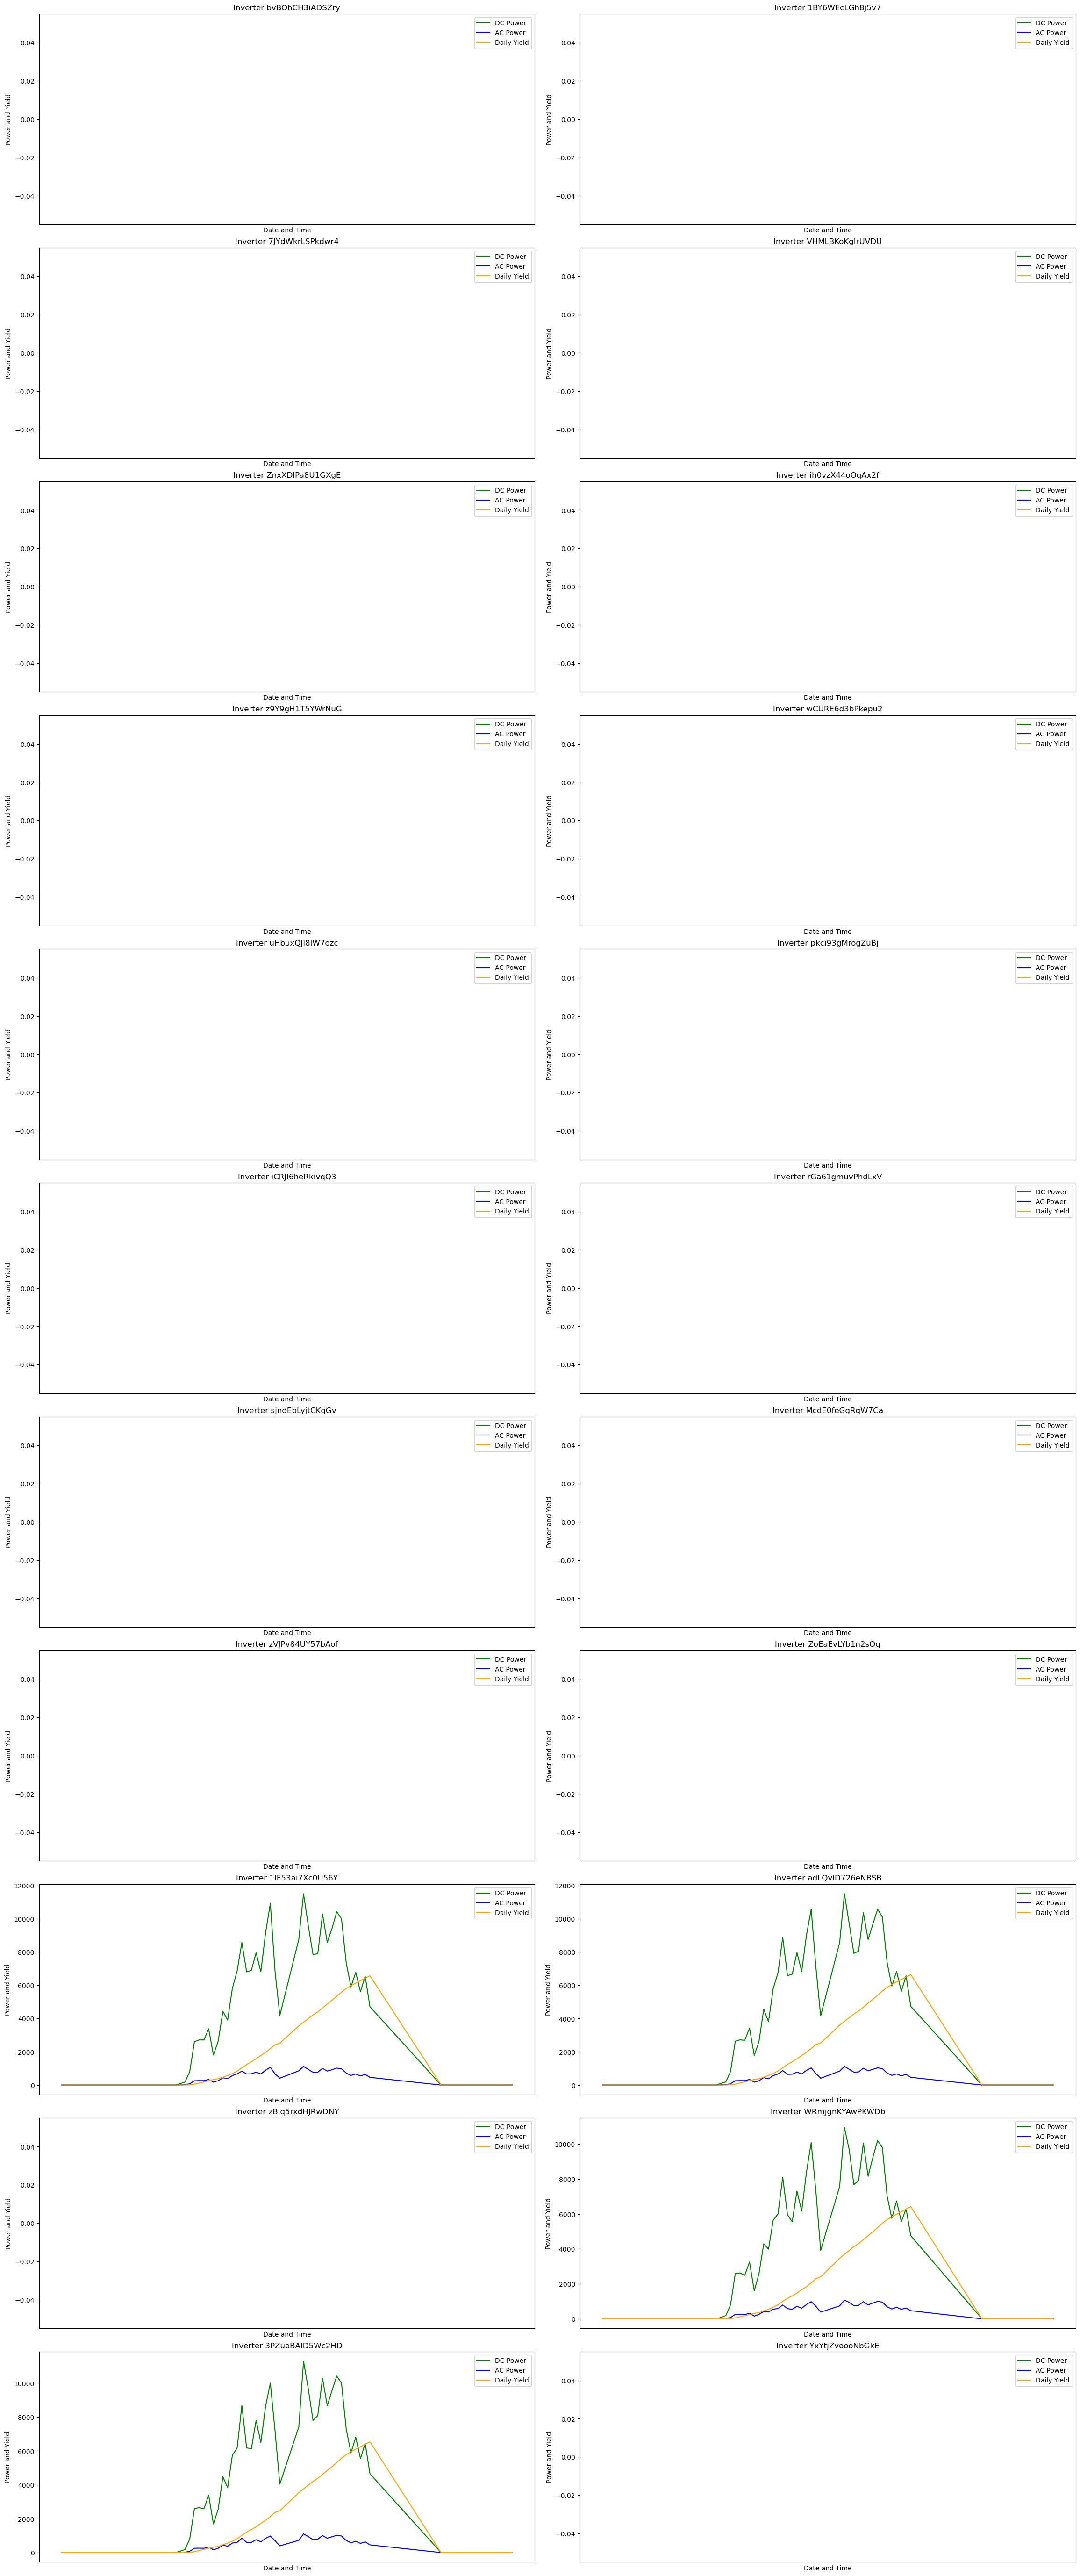

In [60]:
df_test = copy_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

are still present inverters with anomalies we select them 

In [61]:
anomaly_inverters = []
anomaly_inverters.append(p1_invertes[-2])
anomaly_inverters.append(p1_invertes[-3])
anomaly_inverters.append(p1_invertes[-5])
anomaly_inverters.append(p1_invertes[-6])

This code performs a process of detecting and correcting anomalies in the daily output of PV inverters in a DataFrame. The code focuses on inverters that have a daily energy production (daily_yield) of zero on certain days. For such days, it corrects the daily production values to the correct value observed at 4 p.m. 

In [62]:

for i in anomaly_inverters:

    inverter_p1 = p1_gen_df[p1_gen_df['source_key'] == i]
   
    inverter_p1['date_time_hours'] = inverter_p1['date_time'].dt.strftime('%H:%M')
   
    daily_yield_total = inverter_p1[inverter_p1['date_time'].dt.time == pd.to_datetime('23:45:00').time()]
    
    daily_yield_t = daily_yield_total[daily_yield_total['daily_yield'] == 0]
    
    daily_yield_t['date_only'] = daily_yield_t['date_time'].dt.strftime('%Y-%m-%d')
    date_list2 = daily_yield_t['date_only'].tolist()
    date_list_p1 = pd.to_datetime(date_list2)
    
    inverter_p1['date_only'] = inverter_p1['date_time'].dt.normalize()
    
    filtered_df2 = inverter_p1[inverter_p1['date_only'].isin(date_list_p1)]
    
    days = filtered_df2['date_only'].unique()
   
    for j in days:
        spec_day = filtered_df2[filtered_df2['date_only'] == j]
        correct_value_for_inv = spec_day[spec_day['date_time_hours'] == '16:00']
        
        if not correct_value_for_inv.empty:
            correct_value = correct_value_for_inv['daily_yield'].iloc[0]
            rows_to_change = spec_day[spec_day['date_time_hours'] > '16:00'].index
            p1_gen_df.loc[rows_to_change, 'daily_yield'] = correct_value

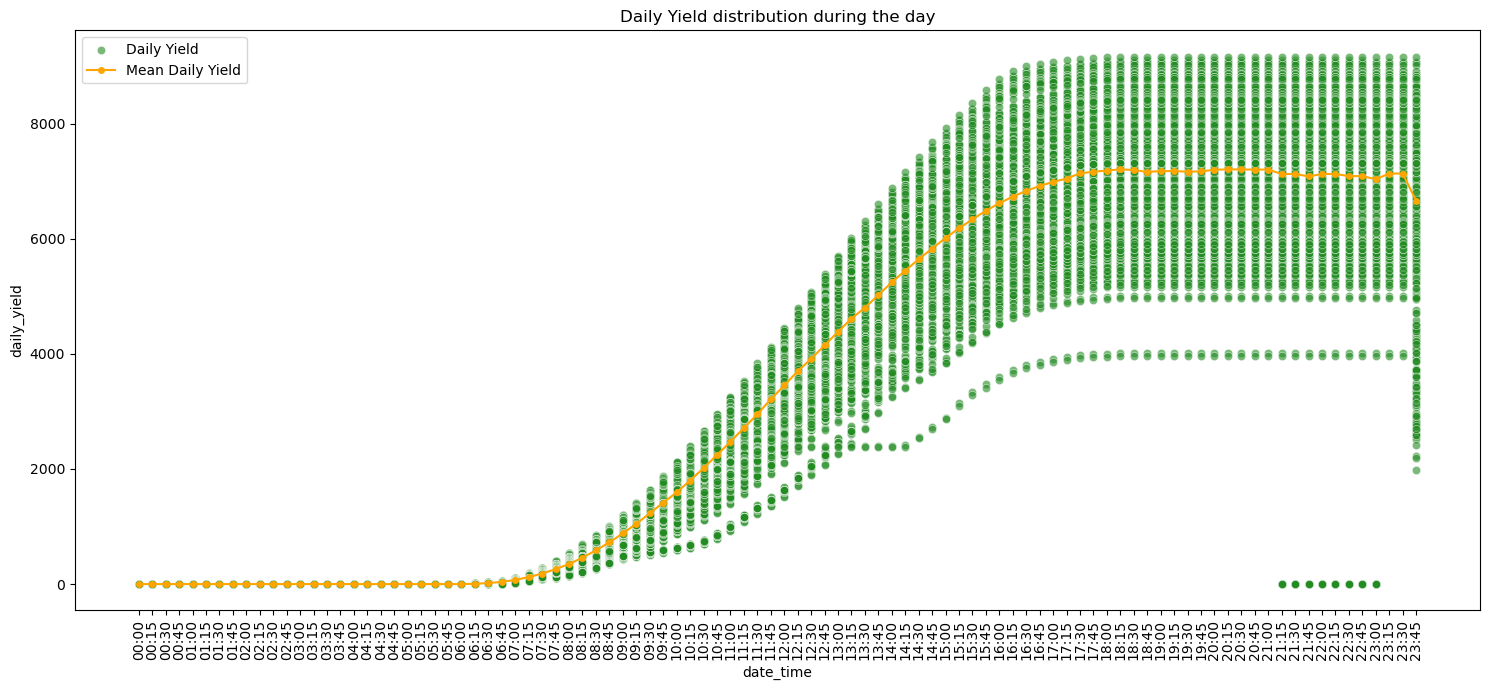

In [63]:
plot_copy = p1_gen_df.copy()
plot_copy['date_time'] = plot_copy['date_time'].dt.strftime('%H:%M')
mean_dy = plot_copy.groupby('date_time')['daily_yield'].mean().reset_index()

plt.figure(figsize=(15, 7))
sns.scatterplot(data=plot_copy, x='date_time', y='daily_yield', alpha=0.6, color='forestgreen', label='Daily Yield')
plt.plot(mean_dy['date_time'], mean_dy['daily_yield'], color='orange', marker='o', linestyle='-', linewidth=1.5, markersize=4, label='Mean Daily Yield')
plt.title('Daily Yield distribution during the day')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.grid(False)
plt.show()

We note the reduction in days with anomalies 

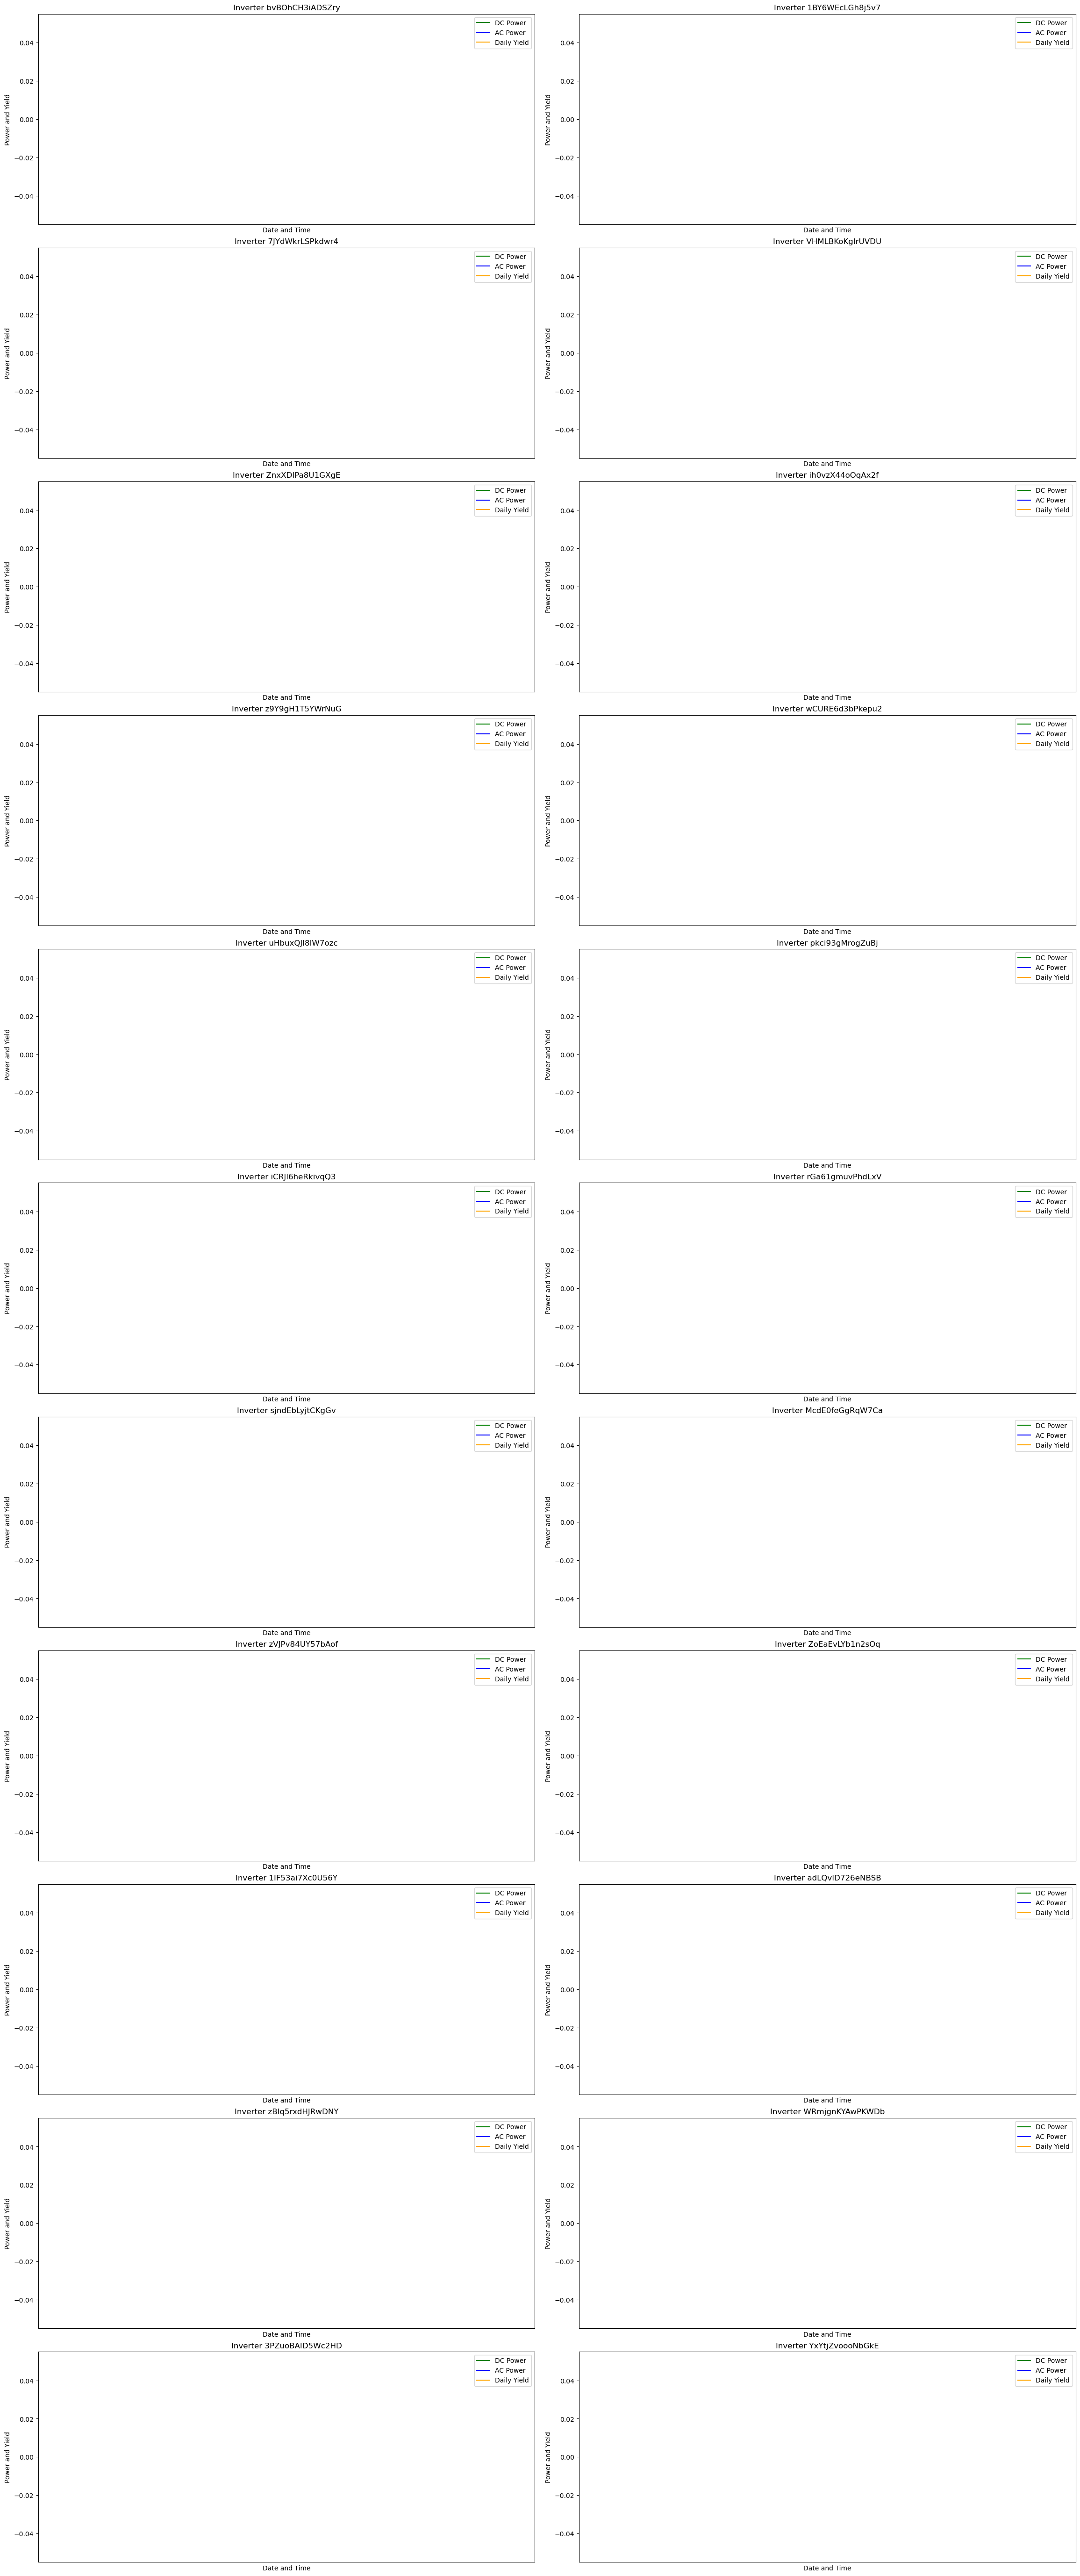

In [64]:
df_test = p1_gen_df.copy()
n_inverters = len(p1_invertes)
n_cols = 2
n_rows = (n_inverters + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, i in enumerate(p1_invertes):
    ax = axes[idx]
    inverter_test = df_test[df_test['source_key'] == i] #select the inverter
    daily_yield_tot = inverter_test[inverter_test['date_time'].dt.time == pd.to_datetime('23:45:00').time()] #get the daily production for each inverter
    daily_yield_tot_0 = daily_yield_tot[daily_yield_tot['daily_yield'] == 0] #selecting the day for which the production is 0
    daily_yield_tot_0['date_only'] = daily_yield_tot_0['date_time'].dt.strftime('%Y-%m-%d')
    date_list = daily_yield_tot_0['date_only'].tolist()
    date_list_dt = pd.to_datetime(date_list)
    inverter_test['date_only'] = inverter_test['date_time'].dt.normalize()
    filtered_df = inverter_test[inverter_test['date_only'].isin(date_list_dt)] #getting for each inverter all the hourly observation for each day without production
    
    
    ax.plot(filtered_df['date_time'], filtered_df['dc_power'], color='green', label='DC Power')
    ax.plot(filtered_df['date_time'], filtered_df['ac_power'], color='blue', label='AC Power')
    ax.plot(filtered_df['date_time'], filtered_df['daily_yield'], color='orange', label='Daily Yield')
    ax.set_xlabel('Date and Time')
    ax.set_ylabel('Power and Yield')
    ax.set_title(f'Inverter {i}')
    ax.legend()
    ax.set_xticks([])
    ax.set_xticklabels([])
plt.show()

In [65]:
#dropping date_time_hours column
p1_gen_df.drop(columns=['date_time_hours'], inplace=True)
#final dataset
p1_gen_df

date_time  plant_id       source_key  dc_power  ac_power  \
0     2020-05-15 00:00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1     2020-05-15 00:00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2     2020-05-15 00:00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3     2020-05-15 00:00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4     2020-05-15 00:00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   
...                   ...       ...              ...       ...       ...   
68773 2020-06-17 23:45:00   4135001  uHbuxQJl8lW7ozc       0.0       0.0   
68774 2020-06-17 23:45:00   4135001  wCURE6d3bPkepu2       0.0       0.0   
68775 2020-06-17 23:45:00   4135001  z9Y9gH1T5YWrNuG       0.0       0.0   
68776 2020-06-17 23:45:00   4135001  zBIq5rxdHJRwDNY       0.0       0.0   
68777 2020-06-17 23:45:00   4135001  zVJPv84UY57bAof       0.0       0.0   

       daily_yield  total_yield  
0            0.000    6259559.0  
1            0.000    6183645.0  
2            0.000    6987759.0  
3            0.000    7602960.0  
4            0.000    7158964.0  
...            ...          ...  
68773     5967.000    7287002.0  
68774     5147.625    7028601.0  
68775     5819.000    7251204.0  
68776     5817.000    6583369.0  
68777     5910.000    7363272.0  

[68778 rows x 7 columns]

<h2>Merging P1 Power Generator Dataset with P1 Weather Dataset</h2>

In [66]:
p1= pd.merge(p1_gen_df, p1_wea_df, on=['date_time'], how='inner')
p1 = p1.drop(columns=['plant_id_x', 'plant_id_y', 'source_key_y'])
#p1.head(5)
p1['dc_power'] = p1['dc_power'] / 10

Total_ac_P1 = p1.groupby(['source_key_x'])['ac_power'].sum().reset_index()
Total_dc_P1 = p1.groupby(['source_key_x'])['dc_power'].sum().reset_index()
Total_dcac_P1 = pd.merge(Total_dc_P1,Total_ac_P1, on=['source_key_x'], how='inner')
Total_dcac_P1['AC/DC'] = (Total_ac_P1['ac_power'] / Total_dc_P1['dc_power'])*100
print(f"Efficency of inverters in Plant1:\n {Total_dcac_P1}")

Efficency of inverters in Plant1:
        source_key_x      dc_power       ac_power      AC/DC
0   1BY6WEcLGh8j5v7  9.050718e+05  885397.597498  97.826232
1   1IF53ai7Xc0U56Y  1.002774e+06  980571.764166  97.785917
2   3PZuoBAID5Wc2HD  1.001501e+06  979326.758928  97.785905
3   7JYdWkrLSPkdwr4  9.787883e+05  957227.923409  97.797236
4   McdE0feGgRqW7Ca  1.000387e+06  978325.520717  97.794752
5   VHMLBKoKgIrUVDU  1.002959e+06  980751.386356  97.785820
6   WRmjgnKYAwPKWDb  9.811144e+05  959471.861313  97.794087
7   YxYtjZvoooNbGkE  9.840778e+05  962361.999044  97.793282
8   ZnxXDlPa8U1GXgE  9.970080e+05  974979.435833  97.790532
9   ZoEaEvLYb1n2sOq  9.775391e+05  955995.655951  97.796156
10  adLQvlD726eNBSB  1.016227e+06  993659.608449  97.779283
11  bvBOhCH3iADSZry  8.912634e+05  871983.765121  97.836819
12  iCRJl6heRkivqQ3  9.959477e+05  973933.485237  97.789622
13  ih0vzX44oOqAx2f  9.668394e+05  945595.566073  97.802751
14  pkci93gMrogZuBj  9.867657e+05  964992.689521  97.793497
15  r

In [67]:
#exporting the df
#p1.to_csv('first_plant.csv',index=False)

merged dataset

In [68]:
p1.head(10)

date_time     source_key_x  dc_power  ac_power  daily_yield  total_yield  \
0 2020-05-15  1BY6WEcLGh8j5v7       0.0       0.0          0.0    6259559.0   
1 2020-05-15  1IF53ai7Xc0U56Y       0.0       0.0          0.0    6183645.0   
2 2020-05-15  3PZuoBAID5Wc2HD       0.0       0.0          0.0    6987759.0   
3 2020-05-15  7JYdWkrLSPkdwr4       0.0       0.0          0.0    7602960.0   
4 2020-05-15  McdE0feGgRqW7Ca       0.0       0.0          0.0    7158964.0   
5 2020-05-15  VHMLBKoKgIrUVDU       0.0       0.0          0.0    7206408.0   
6 2020-05-15  WRmjgnKYAwPKWDb       0.0       0.0          0.0    7028673.0   
7 2020-05-15  ZnxXDlPa8U1GXgE       0.0       0.0          0.0    6522172.0   
8 2020-05-15  ZoEaEvLYb1n2sOq       0.0       0.0          0.0    7098099.0   
9 2020-05-15  adLQvlD726eNBSB       0.0       0.0          0.0    6271355.0   

   ambient_temperature  module_temperature  irradiation  
0            25.184316           22.857507          0.0  
1            25.184316           22.857507          0.0  
2            25.184316           22.857507          0.0  
3            25.184316           22.857507          0.0  
4            25.184316           22.857507          0.0  
5            25.184316           22.857507          0.0  
6            25.184316           22.857507          0.0  
7            25.184316           22.857507          0.0  
8            25.184316           22.857507          0.0  
9            25.184316           22.857507          0.0

<h3>Correlation Matrix of the Merged Dataset P1</H3>

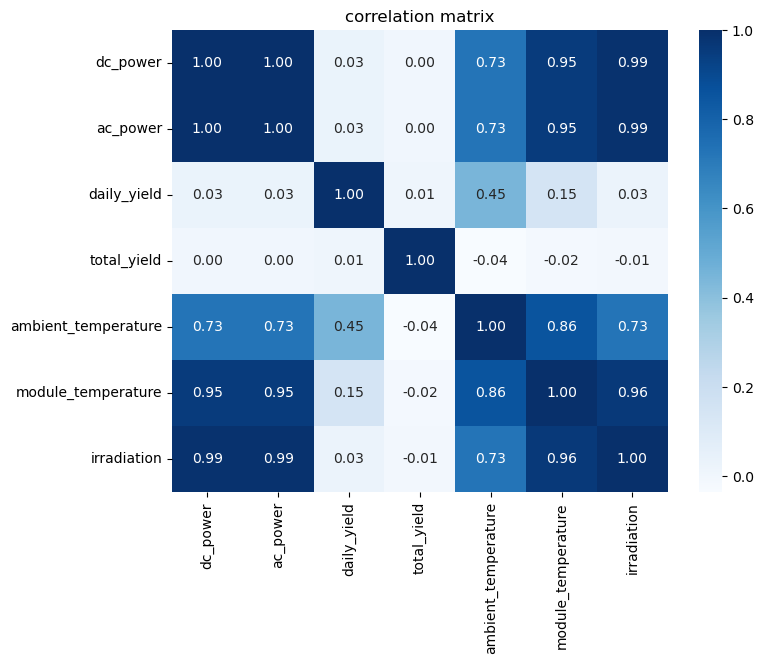

In [69]:
clean_df = p1.copy()
clean_df = clean_df.drop(['source_key_x','date_time'], axis = 1)
corr_matrix = clean_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='Blues')
plt.title('correlation matrix')
plt.show()

Strongly correlated variables: dc_power, ac_power, irradiation and module_temperature.

Weakly correlated variables: daily_yield and total_yield.

Implications for modeling: the strong correlation between some variables suggests that there may be multicollinearity to consider in regression models.

<H1>Statistical Models</H1>

<h2>Questions</h2>

1. Can we predict the energy power prodcution?

2. Can we identify the need for panel cleaning/maintenance?



<h3>Importing Libraries</h3>

In [70]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

<h2>Importing the Dataset</h2>

In [71]:
data = pd.read_csv('first_plant.csv')

In [72]:
data.head(5)

date_time     source_key_x  dc_power  ac_power  daily_yield  \
0  2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
1  2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2  2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
3  2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
4  2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0          0.0   

   total_yield  ambient_temperature  module_temperature  irradiation  
0    6259559.0            25.184316           22.857507          0.0  
1    6183645.0            25.184316           22.857507          0.0  
2    6987759.0            25.184316           22.857507          0.0  
3    7602960.0            25.184316           22.857507          0.0  
4    7158964.0            25.184316           22.857507          0.0

---------------------------------

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68730 entries, 0 to 68729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            68730 non-null  object 
 1   source_key_x         68730 non-null  object 
 2   dc_power             68730 non-null  float64
 3   ac_power             68730 non-null  float64
 4   daily_yield          68730 non-null  float64
 5   total_yield          68730 non-null  float64
 6   ambient_temperature  68730 non-null  float64
 7   module_temperature   68730 non-null  float64
 8   irradiation          68730 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.7+ MB


<h2>Data Pre-Processing</h2>

The activity of data cleaning, correction of the outliers, correction of anomalies has been already done

<h3>Distribution of the features</h3>

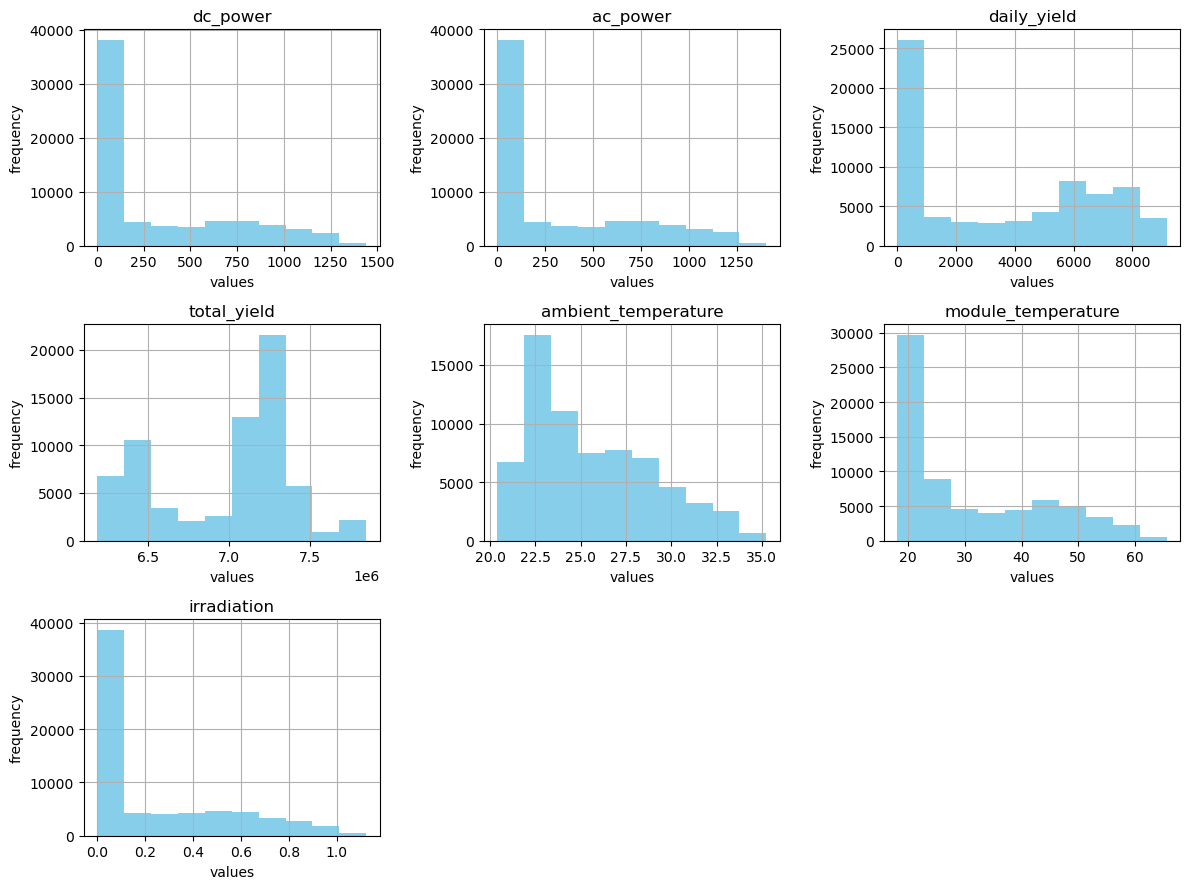

In [74]:
df = data.drop(['source_key_x','date_time'], axis= 1)
columns_per_row = 3
num_columns = df.shape[1]
num_rows = (num_columns + columns_per_row - 1) // columns_per_row

#subplot
fig, axs = plt.subplots(num_rows, columns_per_row, figsize=(12, 9))
axs = axs.flatten()

for column in range(num_columns):
    axs[column].hist(df[df.columns[column]], color='skyblue')
    axs[column].set_title(df.columns[column])
    axs[column].set_xlabel('values')
    axs[column].set_ylabel('frequency')
    axs[column].grid()

# hide empty graphs
for i in range(num_columns, len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


This is the distribution of the variables; we can see that they are skewed to the left, but we will not handle this as an error in data registration because it is consistent with the observed phenomena in our dataset.

<h3>Encode the variable: 'source_key_x'</h3>

since this is a categorical varible, in order to allow the models to take it in consideration we can create the dummy varibales from it 

In [75]:
#inverter encoding
df_encoded = pd.get_dummies(data, columns=['source_key_x'])
df_encoded

date_time  dc_power  ac_power  daily_yield  total_yield  \
0      2020-05-15 00:00:00       0.0       0.0        0.000    6259559.0   
1      2020-05-15 00:00:00       0.0       0.0        0.000    6183645.0   
2      2020-05-15 00:00:00       0.0       0.0        0.000    6987759.0   
3      2020-05-15 00:00:00       0.0       0.0        0.000    7602960.0   
4      2020-05-15 00:00:00       0.0       0.0        0.000    7158964.0   
...                    ...       ...       ...          ...          ...   
68725  2020-06-17 23:45:00       0.0       0.0     5967.000    7287002.0   
68726  2020-06-17 23:45:00       0.0       0.0     5147.625    7028601.0   
68727  2020-06-17 23:45:00       0.0       0.0     5819.000    7251204.0   
68728  2020-06-17 23:45:00       0.0       0.0     5817.000    6583369.0   
68729  2020-06-17 23:45:00       0.0       0.0     5910.000    7363272.0   

       ambient_temperature  module_temperature  irradiation  \
0                25.184316           22.857507          0.0   
1                25.184316           22.857507          0.0   
2                25.184316           22.857507          0.0   
3                25.184316           22.857507          0.0   
4                25.184316           22.857507          0.0   
...                    ...                 ...          ...   
68725            21.909288           20.427972          0.0   
68726            21.909288           20.427972          0.0   
68727            21.909288           20.427972          0.0   
68728            21.909288           20.427972          0.0   
68729            21.909288           20.427972          0.0   

       source_key_x_1BY6WEcLGh8j5v7  source_key_x_1IF53ai7Xc0U56Y  ...  \
0                                 1                             0  ...   
1                                 0                             1  ...   
2                                 0                             0  ...   
3                                 0                             0  ...   
4                                 0                             0  ...   
...                             ...                           ...  ...   
68725                             0                             0  ...   
68726                             0                             0  ...   
68727                             0                             0  ...   
68728                             0                             0  ...   
68729                             0                             0  ...   

       source_key_x_iCRJl6heRkivqQ3  source_key_x_ih0vzX44oOqAx2f  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
68725                             0                             0   
68726                             0                             0   
68727                             0                             0   
68728                             0                             0   
68729                             0                             0   

       source_key_x_pkci93gMrogZuBj  source_key_x_rGa61gmuvPhdLxV  \
0                                 0                             0   
1                                 0                             0   
2                                 0                             0   
3                                 0                             0   
4                                 0                             0   
...                             ...                           ...   
68725                             0                             0   
68726                             0                             0   
68727   

<h2>Handle Multicollinearity</h2>

Thanks to the correlation matrix that we have seen before some features appear to be very strongly correlated with each others, in order to handle the problem of multicollinearity we will drop the variable 'dc_power' which has a 0.99 positive correlation with 'ac_power'. Despite the high correlation of the variables 'module_temperature' and 'ambient_temperature' since they provide different information that could be important to our model we try to keep them

In [76]:
#drop the column dc_power
df_encoded.drop(columns=['dc_power'],inplace=True)

<h3>'date_time' column management </h3>

In order to make it easy to manage this varibale we change its type in format date time and then we converts the values  from datetime objects to Unix timestamps (number of seconds elapsed since January 1, 1970). This step is necessary in order to allow our machine learning models to manage data in a date time format. 
A Unix timestamp is a continuous number representing time, which can be easily interpreted by models.

In [77]:
#changing in format date_time
df_encoded['date_time'] = pd.to_datetime(df_encoded['date_time'], format='%Y-%m-%d %H:%M:%S')
df_encoded['date_time'].dtype

dtype('<M8[ns]')

In [78]:
#transforming in timestamps
df_encoded['date_time'] = df_encoded['date_time'].apply(lambda x: x.timestamp())
df_encoded['date_time'].dtype

dtype('float64')

<h2>Can we predict the power generation for next couple of days? - this allows for better grid management</h2>

In order to answer that question we try to build different models and find the best one

In [79]:
#Setting the variables
X = df_encoded.drop(['daily_yield'], axis=1)
y = df_encoded['daily_yield'] #the target variable which we are trying to predict is the daily yield

<H2>MODEL SELECTION</H2>

We will try to build different models and we will evalutate their perfomance on the Test set in order to choose the best one

<h2>Multiple Linear Regression</h2>

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from scipy import stats
import statsmodels.api as sm 

In [81]:
#creation of the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
#creation of the multiple linear regression model
multiple_lr = LinearRegression()

In [83]:
#training the model
multiple_lr.fit(X_train, y_train)

LinearRegression()

In [84]:
#predict on the test set
y_pred_multiple_lr = multiple_lr.predict(X_test)

In [85]:
#compute R2 on the test set
r2_multiple_lr = r2_score(y_test, y_pred_multiple_lr)
print(f'R² for Multiple Linear Regression: {r2_multiple_lr}')

R² for Multiple Linear Regression: 0.46288577650810325


In [86]:
#Same model but using the library statsmodel
# Add a constant term to the predictors matrix
X_train_with_const = sm.add_constant(X_train) #add a column of 1 on X_train that it will be used to compute the intercept

# Create a linear regression model using statsmodels
lr_sm = sm.OLS(y_train, X_train_with_const)
results = lr_sm.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            daily_yield   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     1802.
Date:                Wed, 11 Sep 2024   Prob (F-statistic):               0.00
Time:                        13:06:04   Log-Likelihood:            -5.0388e+05
No. Observations:               54984   AIC:                         1.008e+06
Df Residuals:                   54956   BIC:                         1.008e+06
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [87]:
#coefficients
coefficients = results.params
print("Coefficients:")
print(coefficients)

Coefficients:
const                           2.250860e+07
date_time                      -1.564107e-02
ac_power                       -1.579895e+00
total_yield                     1.913528e-01
ambient_temperature             1.094268e+03
module_temperature             -2.148181e+02
irradiation                     1.937283e+03
source_key_x_1BY6WEcLGh8j5v7    1.137901e+06
source_key_x_1IF53ai7Xc0U56Y    1.150732e+06
source_key_x_3PZuoBAID5Wc2HD    9.968964e+05
source_key_x_7JYdWkrLSPkdwr4    8.796745e+05
source_key_x_McdE0feGgRqW7Ca    9.641135e+05
source_key_x_VHMLBKoKgIrUVDU    9.550399e+05
source_key_x_WRmjgnKYAwPKWDb    9.894349e+05
source_key_x_YxYtjZvoooNbGkE    9.604484e+05
source_key_x_ZnxXDlPa8U1GXgE    1.086071e+06
source_key_x_ZoEaEvLYb1n2sOq    9.763140e+05
source_key_x_adLQvlD726eNBSB    1.133745e+06
source_key_x_bvBOhCH3iADSZry    1.127177e+06
source_key_x_iCRJl6heRkivqQ3    9.606599e+05
source_key_x_ih0vzX44oOqAx2f    1.151197e+06
source_key_x_pkci93gMrogZuBj    9.625277e

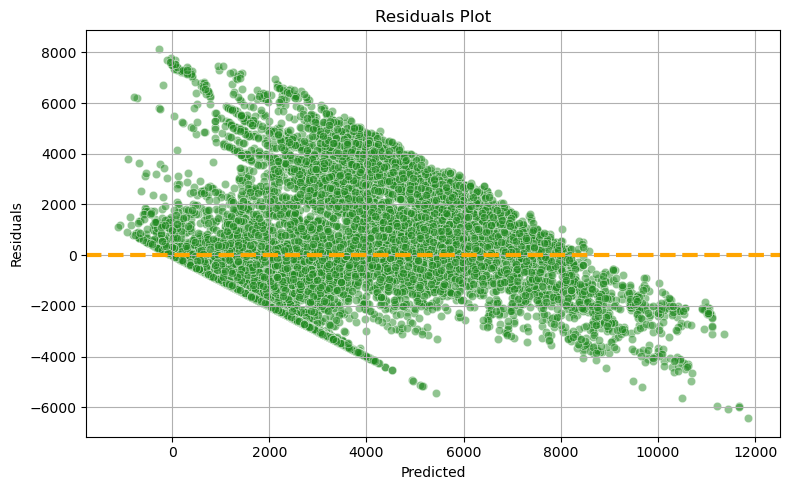

In [88]:
#Plot of the Residuals
custom_palette = ['forestgreen','orange']
residuals = y_test - y_pred_multiple_lr
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_multiple_lr, y=residuals, color=custom_palette[0], alpha=0.5)
plt.axhline(y=0, color=custom_palette[1], linestyle='--', lw=3)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.tight_layout()
plt.show()

The residuals graph represents the residuals (difference between observed and predicted values) from the predicted values.
This  dispersion indicates a potential problem of heteroscedasticity, that is, the variance of the residuals is not constant across the range of predicted values.
This may affect the reliability of statistical inferences from the regression model.

In order to address the problem of heteroscedasticity we can try to make the logaritm of the response variable y

In [89]:
y_log = np.log(y+1) #applying the logarithm to the variable y

#splitting the dataset with log y
X_train2, X_test2, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

#creating the model
lr_log = LinearRegression()

#train the model
lr_log.fit(X_train2, y_train_log)

#prediction
y_pred_log = lr_log.predict(X_test2)

#R2 on test set
r2_log_model = r2_score(y_test_log, y_pred_log)
print(f'R² for Multiple Linear Regression with Log-transformed : {r2_log_model}')
print(f'R² for Multiple Linear Regression: {r2_multiple_lr}')


R² for Multiple Linear Regression with Log-transformed : 0.418111326396445
R² for Multiple Linear Regression: 0.46288577650810325


As we can see despite the logartim transformation the model is not improved, so it will be wise to try a different model

<H2>Forward Stepwie Selection</h2>

We try to propose an alternative fitting procedure in particular we try to use the Forward Stepwise Selection which is a subset selection technique to which we try to identify a subset of predictors  that contribute most to predicting the dependent variable

forward stepwise selection, This method can produce more robust models than standard multiple linear regression because it selects variables based on their ability to improve the model, reducing the risk of overfitting and potentially improving residual handling.

In [90]:
import itertools 
import time
from sklearn import linear_model

In [91]:
#function to fit the linear regression model

def fit_linear_reg(X,Y):
    model_k = linear_model.LinearRegression(fit_intercept=True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R2 = model_k.score(X,Y)
    return RSS,R2

In [92]:
#initializing the variables:
y = y_train
x = X_train
k = X_train.shape[1] #number of predictors

remaining_features = list(x.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf

    for combo in itertools.combinations(remaining_features,1):
        RSS = fit_linear_reg(x[list(combo) + features],y)

        if RSS[0] < best_RSS:
            best_RSS = RSS[0]
            best_R_squared = RSS[1] 
            best_feature = combo[0]
    
    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)

    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [93]:
#Displaying results of the first 4 steps
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,5)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['ambient_temperature'], 442983190225),
 (2, ['ambient_temperature', 'module_temperature'], 328977791086),
 (3, ['ambient_temperature', 'module_temperature', 'date_time'], 309969451152),
 (4,
  ['ambient_temperature',
   'module_temperature',
   'date_time',
   'source_key_x_bvBOhCH3iADSZry'],
  309608823119)]

Comparing models: AIC, BIC, Mallows'CP

In [94]:
#Combining forward stepwise results into a new DataFrame
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

In [95]:
#Initializing useful variables
m = len(y)
p = 28
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

features           RSS  \
1                               [ambient_temperature]  4.429832e+11   
2           [ambient_temperature, module_temperature]  3.289778e+11   
3   [ambient_temperature, module_temperature, date...  3.099695e+11   
4   [ambient_temperature, module_temperature, date...  3.096088e+11   
5   [ambient_temperature, module_temperature, date...  3.093109e+11   
6   [ambient_temperature, module_temperature, date...  3.090990e+11   
7   [ambient_temperature, module_temperature, date...  3.088738e+11   
8   [ambient_temperature, module_temperature, date...  3.088215e+11   
9   [ambient_temperature, module_temperature, date...  3.087980e+11   
10  [ambient_temperature, module_temperature, date...  3.087813e+11   
11  [ambient_temperature, module_temperature, date...  3.087633e+11   
12  [ambient_temperature, module_temperature, date...  3.087520e+11   
13  [ambient_temperature, module_temperature, date...  3.087454e+11   
14  [ambient_temperature, module_temperature, date...  3.087388e+11   
15  [ambient_temperature, module_temperature, date...  3.087361e+11   
16  [ambient_temperature, module_temperature, date...  3.087331e+11   
17  [ambient_temperature, module_temperature, date...  3.087314e+11   
18  [ambient_temperature, module_temperature, date...  3.087294e+11   
19  [ambient_temperature, module_temperature, date...  3.087270e+11   
20  [ambient_temperature, module_temperature, date...  3.087241e+11   
21  [ambient_temperature, module_temperature, date...  3.087191e+11   
22  [ambient_temperature, module_temperature, date...  3.086991e+11   
23  [ambient_temperature, module_temperature, date...  3.086124e+11   
24  [ambient_temperature, module_temperature, date...  3.079399e+11   
25  [ambient_temperature, module_temperature, date...  3.071500e+11   
26  [ambient_temperature, module_temperature, date...  2.948571e+11   
27  [ambient_temperature, module_temperature, date...  2.935541e+11   
28  [ambient_temperature, module_temperature, date...  2.935541e+11   

    R_squared  numb_features           C_p       AIC       BIC  R_squared_adj  
1    0.199589              1  8.056778e+06  1.508275  1.508437       0.199574  
2    0.405581              2  5.983544e+06  1.120153  1.120478       0.405560  
3    0.439927              3  5.638031e+06  1.055472  1.055958       0.439896  
4    0.440578              4  5.631667e+06  1.054280  1.054929       0.440538  
5    0.441117              5  5.626443e+06  1.053302  1.054113       0.441066  
6    0.441500              6  5.622782e+06  1.052617  1.053590       0.441439  
7    0.441906              7  5.618882e+06  1.051887  1.053022       0.441835  
8    0.442001              8  5.618125e+06  1.051745  1.053042       0.441920  
9    0.442043              9  5.617892e+06  1.051701  1.053161       0.441952  
10   0.442074             10  5.617782e+06  1.051681  1.053302       0.441972  
11   0.442106             11  5.617649e+06  1.051656  1.053439       0.441995  
12   0.442127             12  5.617638e+06  1.051654  1.053600       0.442005  
13   0.442138             13  5.617712e+06  1.051668  1.053776       0.442007  
14   0.442150             14  5.617786e+06  1.051682  1.053951       0.442008  
15   0.442155             15  5.617931e+06  1.051709  1.054141       0.442003  
16   0.442161             16  5.618072e+06  1.051735  1.054329       0.441998  
17   0.442164             17  5.618235e+06  1.051766  1.054522       0.441991  
18   0.442167             18  5.618393e+06  1.051795  1.054714       0.441985  
19   0.442172             19  5.618544e+06  1.051823  1.054904       0.441979  
20   0.442177             20  5.618685e+06  1.051850  1.055093       0.441974  
21   0.442186             21  5.618789e+06  1.051869  1.055274       0.441973  
22   0.442222             22  5.618619e+06  1.051838  1.055404       0.441999  
23   0.442379             23  5.617236e+06  1.051579  1.055308       0.442146  
24   0.443594             24  5.605199e+06  1.049325  1.053216   

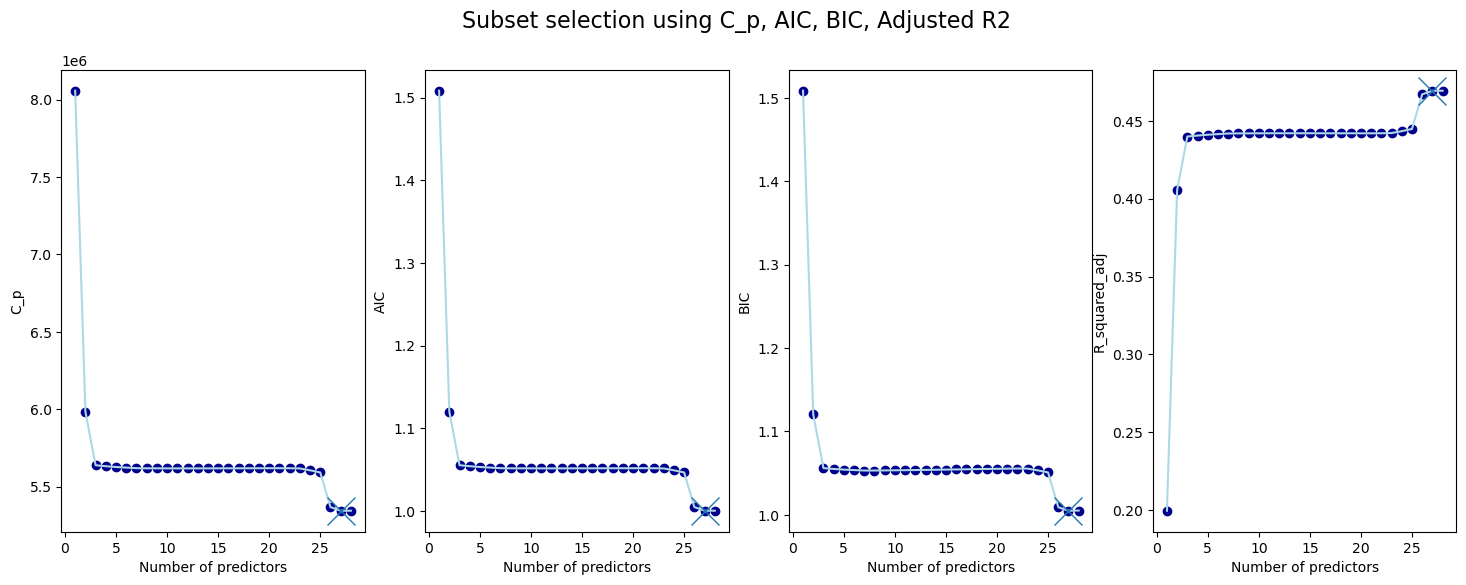

In [96]:
#Plotting the computed values as a function of number of features
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [97]:
#finding the best model based on R_squared_adj
best_model = df1.loc[df1['R_squared_adj'] == df1['R_squared_adj'].max()]
best_model

features           RSS  \
27  [ambient_temperature, module_temperature, date...  2.935541e+11   

    R_squared  numb_features           C_p       AIC       BIC  R_squared_adj  
27   0.469587             27  5.344146e+06  1.000455  1.004832       0.469327

In [98]:
#features of the best model
list(best_model['features'])

[['ambient_temperature',
  'module_temperature',
  'date_time',
  'source_key_x_bvBOhCH3iADSZry',
  'ac_power',
  'source_key_x_1BY6WEcLGh8j5v7',
  'irradiation',
  'source_key_x_adLQvlD726eNBSB',
  'source_key_x_ih0vzX44oOqAx2f',
  'source_key_x_WRmjgnKYAwPKWDb',
  'source_key_x_sjndEbLyjtCKgGv',
  'source_key_x_z9Y9gH1T5YWrNuG',
  'source_key_x_uHbuxQJl8lW7ozc',
  'source_key_x_VHMLBKoKgIrUVDU',
  'source_key_x_7JYdWkrLSPkdwr4',
  'source_key_x_ZoEaEvLYb1n2sOq',
  'source_key_x_YxYtjZvoooNbGkE',
  'source_key_x_pkci93gMrogZuBj',
  'total_yield',
  'source_key_x_1IF53ai7Xc0U56Y',
  'source_key_x_ZnxXDlPa8U1GXgE',
  'source_key_x_zBIq5rxdHJRwDNY',
  'source_key_x_wCURE6d3bPkepu2',
  'source_key_x_3PZuoBAID5Wc2HD',
  'source_key_x_iCRJl6heRkivqQ3',
  'source_key_x_McdE0feGgRqW7Ca',
  'source_key_x_rGa61gmuvPhdLxV']]

In [99]:
#R2 of the best model
stepwise_selection_model = best_model.copy()
r2_forward = stepwise_selection_model['R_squared'].iloc[0]
r2_forward

0.4695871808859068

<h2>Lasso Regression</h2>

Since we noticed an improvement in performance using forward stepwise selection, we try using an even less flexible linear model

In [100]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

In [101]:
#lasso scaled variable
#standardization of the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [102]:
#lasso scaled
#creation of the lasso model
alphas = [0.2, 0.5, 0.7, 1.0, 5.0, 10.0, 30.0]

best_alpha = None
max_r2 = 0

for alpha in alphas:
    
    lasso_model = Lasso(alpha=alpha)
    
    #train
    lasso_model.fit(X_train_scaled, y_train)
    
    #prediction
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    
    #R2
    r2 = r2_score(y_test, y_pred_lasso)
    if r2 > max_r2:
        max_r2 = r2
        best_alpha = alpha

In [103]:
print(f"Best R² on test set: {max_r2:.4f} with alpha: {best_alpha}")

Best R² on test set: 0.4368 with alpha: 0.2


In [104]:
#Lasso Model with best alpha
lasso = Lasso(alpha=best_alpha)
    
lasso.fit(X_train_scaled, y_train)

y_pred_lasso2 = lasso.predict(X_test_scaled)
    
#R2
r2_lasso = r2_score(y_test, y_pred_lasso2)
r2_lasso

0.4367595162660777

In [105]:
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
lasso_coef

Feature  Coefficient
0                      date_time   172.058432
1                       ac_power  -699.197460
2                    total_yield  2571.535720
3            ambient_temperature  4044.120134
4             module_temperature -2774.266845
5                    irradiation   528.503080
6   source_key_x_1BY6WEcLGh8j5v7   835.589483
7   source_key_x_1IF53ai7Xc0U56Y   989.838006
8   source_key_x_3PZuoBAID5Wc2HD   -45.726432
9   source_key_x_7JYdWkrLSPkdwr4  -842.943294
10  source_key_x_McdE0feGgRqW7Ca  -266.253387
11  source_key_x_VHMLBKoKgIrUVDU  -320.584156
12  source_key_x_WRmjgnKYAwPKWDb  -116.696529
13  source_key_x_YxYtjZvoooNbGkE  -297.856116
14  source_key_x_ZnxXDlPa8U1GXgE   552.408728
15  source_key_x_ZoEaEvLYb1n2sOq  -194.469623
16  source_key_x_adLQvlD726eNBSB   897.812417
17  source_key_x_bvBOhCH3iADSZry   738.155631
18  source_key_x_iCRJl6heRkivqQ3  -287.859358
19  source_key_x_ih0vzX44oOqAx2f   964.692963
20  source_key_x_pkci93gMrogZuBj  -285.238223
21  source_key_x_rGa61gmuvPhdLxV  -207.724818
22  source_key_x_sjndEbLyjtCKgGv  -101.572986
23  source_key_x_uHbuxQJl8lW7ozc  -102.695441
24  source_key_x_wCURE6d3bPkepu2   215.250188
25  source_key_x_z9Y9gH1T5YWrNuG   -85.174424
26  source_key_x_zBIq5rxdHJRwDNY   784.531477
27  source_key_x_zVJPv84UY57bAof  -213.492810

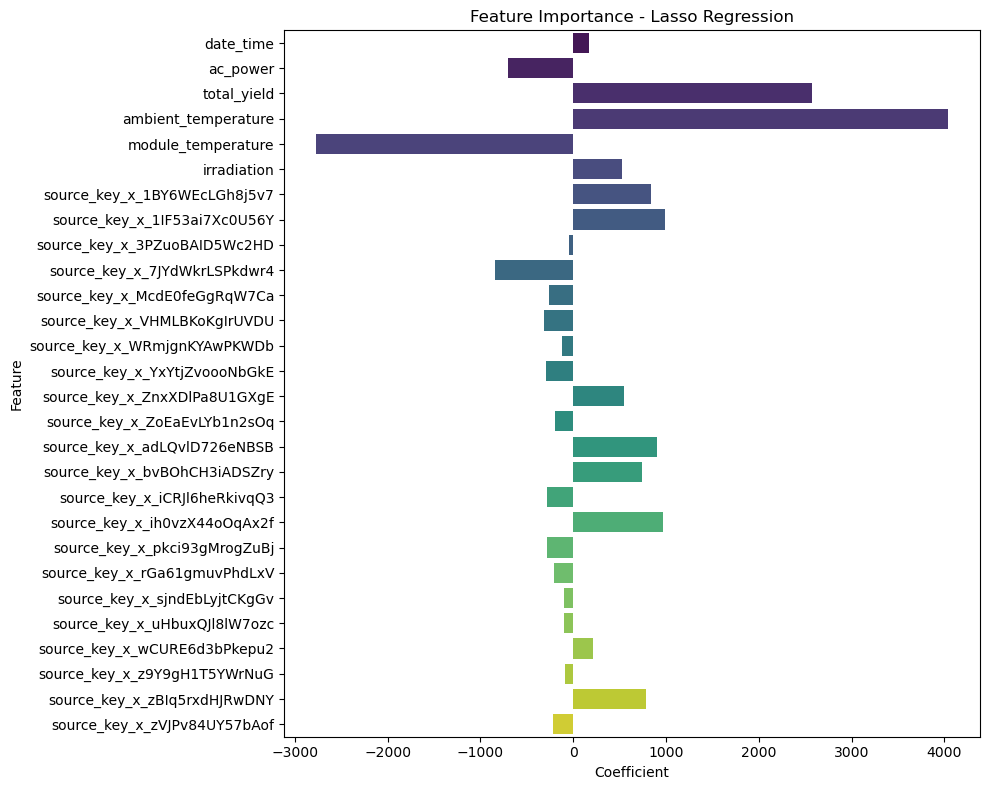

In [106]:
# Example DataFrame with coefficients (replace with your actual data)
lasso_coef = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=lasso_coef, palette='viridis')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.title('Feature Importance - Lasso Regression')
plt.tight_layout()
plt.show()

Horizontal bars: Each bar in the graph represents a predictor variable (feature). The length of the bar corresponds to the  value of the estimated coefficient for that variable in the Lasso model. the longer bars represent the coefficients with higher value thus those that were less penalized less pushed to 0 by the lasso 

<h2>Decision Tree Regression</h2>

Since we have noticed that linear models do not have optimal performance let us try using a nonlinear model and that does not assume that the variance of the errors is constant.

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
dt_model = DecisionTreeRegressor(max_depth=5)  # Max_depth limits the deep of the tree to avoid overfitting
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [109]:
#prediction
y_pred_dt = dt_model.predict(X_test)

#R2
r2_dt = r2_score(y_test, y_pred_dt)
print(f'R² on test set for Decision Tree Regression: {r2_dt:.3f}')

R² on test set for Decision Tree Regression: 0.638


<h2>Random Forest Regression</h2>

The Random Forest is composed of a set of Decision Trees, each of which is trained on a random subset of the training data. This approach reduces the overall variance of the model compared to a single Decision Tree, making it less sensitive to variations in the data and outliers. It is a more flexible model that can capture complex, nonlinear relationships between the predictor variables and the response variable. By combining many decision trees (ensembles), it can better fit complex models and nonlinear data. Since decision tree tends to soffer of high variance this ensamble method try to work in order to reduce it

In [110]:
from sklearn.ensemble import RandomForestRegressor

In [111]:
#Random forest with 100 trees
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [112]:
# Prediction
y_pred_rf = rf_model.predict(X_test)

#R2
r2_rf = r2_score(y_test, y_pred_rf)
print(f'R² on test set for  Random Forest Regression: {r2_rf:.3f}')

R² on test set for  Random Forest Regression: 0.997


<h2>Performance Evaluation</h2>

In [113]:
print(f'R² for Multiple Linear Regression with Log-transformed : {r2_log_model}')
print(f'R2 of Lasso Regression {r2_lasso}')
print(f'R2 of Multiple Linear Regression: {r2_multiple_lr}')
print(f'R2 of Forward Stepwise Selection: {r2_forward}')
print(f'R2 of Decision Tree Regressor: {r2_dt}')
print(f'R2 of Random Forest Regression: {r2_rf}')

R² for Multiple Linear Regression with Log-transformed : 0.418111326396445
R2 of Lasso Regression 0.4367595162660777
R2 of Multiple Linear Regression: 0.46288577650810325
R2 of Forward Stepwise Selection: 0.4695871808859068
R2 of Decision Tree Regressor: 0.6380051748532016
R2 of Random Forest Regression: 0.9966122973983735


# Classification for Detecting Performance

In [114]:
plant_1 = pd.read_csv('first_plant.csv')

In [115]:
plant_1

date_time     source_key_x  dc_power  ac_power  daily_yield  \
0      2020-05-15 00:00:00  1BY6WEcLGh8j5v7       0.0       0.0        0.000   
1      2020-05-15 00:00:00  1IF53ai7Xc0U56Y       0.0       0.0        0.000   
2      2020-05-15 00:00:00  3PZuoBAID5Wc2HD       0.0       0.0        0.000   
3      2020-05-15 00:00:00  7JYdWkrLSPkdwr4       0.0       0.0        0.000   
4      2020-05-15 00:00:00  McdE0feGgRqW7Ca       0.0       0.0        0.000   
...                    ...              ...       ...       ...          ...   
68725  2020-06-17 23:45:00  uHbuxQJl8lW7ozc       0.0       0.0     5967.000   
68726  2020-06-17 23:45:00  wCURE6d3bPkepu2       0.0       0.0     5147.625   
68727  2020-06-17 23:45:00  z9Y9gH1T5YWrNuG       0.0       0.0     5819.000   
68728  2020-06-17 23:45:00  zBIq5rxdHJRwDNY       0.0       0.0     5817.000   
68729  2020-06-17 23:45:00  zVJPv84UY57bAof       0.0       0.0     5910.000   

       total_yield  ambient_temperature  module_temperature  irradiation  
0        6259559.0            25.184316           22.857507          0.0  
1        6183645.0            25.184316           22.857507          0.0  
2        6987759.0            25.184316           22.857507          0.0  
3        7602960.0            25.184316           22.857507          0.0  
4        7158964.0            25.184316           22.857507          0.0  
...            ...                  ...                 ...          ...  
68725    7287002.0            21.909288           20.427972          0.0  
68726    7028601.0            21.909288           20.427972          0.0  
68727    7251204.0            21.909288           20.427972          0.0  
68728    6583369.0            21.909288           20.427972          0.0  
68729    7363272.0            21.909288           20.427972          0.0  

[68730 rows x 9 columns]

In [116]:
plant_1.describe()

dc_power      ac_power   daily_yield   total_yield  \
count  68730.000000  68730.000000  68730.000000  6.873000e+04   
mean     314.068007    307.145420   3501.076026  6.978700e+06   
std      402.887036    393.660122   3170.654772  4.162708e+05   
min        0.000000      0.000000      0.000000  6.183645e+06   
25%        0.000000      0.000000      0.571429  6.512003e+06   
50%       42.426786     41.007143   3299.642857  7.146685e+06   
75%      635.752857    622.774107   6449.000000  7.268666e+06   
max     1441.342857   1405.300000   9163.000000  7.846821e+06   

       ambient_temperature  module_temperature   irradiation  
count         68730.000000        68730.000000  68730.000000  
mean             25.557297           31.227524      0.231694  
std               3.362014           12.292809      0.301076  
min              20.398505           18.140415      0.000000  
25%              22.716419           21.123944      0.000000  
50%              24.661753           24.812990      0.031577  
75%              27.960429           41.660313      0.454001  
max              35.252486           65.545714      1.122550

In [117]:
plant_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68730 entries, 0 to 68729
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            68730 non-null  object 
 1   source_key_x         68730 non-null  object 
 2   dc_power             68730 non-null  float64
 3   ac_power             68730 non-null  float64
 4   daily_yield          68730 non-null  float64
 5   total_yield          68730 non-null  float64
 6   ambient_temperature  68730 non-null  float64
 7   module_temperature   68730 non-null  float64
 8   irradiation          68730 non-null  float64
dtypes: float64(7), object(2)
memory usage: 4.7+ MB


In [118]:
plant_1['date_time'] = pd.to_datetime(plant_1['date_time']).dt.date

The data has been aggregated at a daily level to avoid nighttime irradiation values, which would otherwise cause the dc_power/irradiation ratio to be zero. Classifying the solar panel performance using these zero values would not make sense. Aggregating the data allows for a better assessment of the daily performance of the panel line.

In [119]:
plant_1 = plant_1.groupby(['date_time', 'source_key_x']).agg({
    'ac_power': 'sum',
    'dc_power': 'sum',
    'irradiation': 'sum',
    'ambient_temperature': 'mean',
    'module_temperature': 'mean',
    'daily_yield': 'sum',
    'total_yield': 'max'  #assuming total_yield is cumulative
}).reset_index()

Create a new column performance_metric by dividing the total DC power (dc_power) by the total irradiation (irradiation). This will be the target variable. Irradiation is used because it is a highly influential variable on the DC power production of the panels, as seen from its high correlation and the coefficients obtained in the regression analysis.

In [120]:
plant_1['performance_metric'] = plant_1['dc_power'] / (plant_1['irradiation'])

In [121]:
plant_1.describe()

ac_power      dc_power  irradiation  ambient_temperature  \
count    748.000000    748.000000   748.000000           748.000000   
mean   28222.065165  28858.147206    21.289232            25.607114   
std     4050.884205   4156.954035     3.391619             1.197387   
min    15916.364285  16241.630357    15.266485            23.850938   
25%    24750.130715  25285.462054    18.245542            24.752468   
50%    28031.099107  28642.551786    21.089792            25.218429   
75%    31937.257144  32667.367857    24.670974            26.835469   
max    36698.738691  37579.779762    27.231458            28.169499   

       module_temperature    daily_yield   total_yield  performance_metric  
count          748.000000     748.000000  7.480000e+02          748.000000  
mean            31.383856  321696.464225  6.980313e+06         1360.911191  
std              2.726834   49920.621087  4.163498e+05           71.759380  
min             27.585834  158335.732142  6.190002e+06          815.892983  
25%             29.448151  285601.680951  6.516959e+06         1328.322000  
50%             30.582565  323238.633928  7.147641e+06         1361.185943  
75%             32.744323  356211.008928  7.269818e+06         1402.989110  
max             39.842044  432107.809526  7.846821e+06         1526.187094

In [122]:
plant_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            748 non-null    object 
 1   source_key_x         748 non-null    object 
 2   ac_power             748 non-null    float64
 3   dc_power             748 non-null    float64
 4   irradiation          748 non-null    float64
 5   ambient_temperature  748 non-null    float64
 6   module_temperature   748 non-null    float64
 7   daily_yield          748 non-null    float64
 8   total_yield          748 non-null    float64
 9   performance_metric   748 non-null    float64
dtypes: float64(8), object(2)
memory usage: 58.6+ KB


In [123]:
plant_1.head()

date_time     source_key_x      ac_power      dc_power  irradiation  \
0  2020-05-15  1BY6WEcLGh8j5v7  23046.550595  23534.069643    19.037010   
1  2020-05-15  1IF53ai7Xc0U56Y  25343.285714  25891.110715    19.036784   
2  2020-05-15  3PZuoBAID5Wc2HD  24937.698214  25476.605357    19.036784   
3  2020-05-15  7JYdWkrLSPkdwr4  24533.910714  25060.833929    19.036784   
4  2020-05-15  McdE0feGgRqW7Ca  25840.633928  26403.098213    19.037010   

   ambient_temperature  module_temperature    daily_yield  total_yield  \
0            27.430823           32.582964  245624.232144    6265313.0   
1            27.775295           33.678643  165187.857146    6190002.0   
2            27.775295           33.678643  162291.999999    6994033.0   
3            27.775295           33.678643  158335.732142    7609076.0   
4            27.430823           32.582964  278998.500000    7165435.0   

   performance_metric  
0         1236.227213  
1         1360.056949  
2         1338.283032  
3         1316.442609  
4         1386.935155

Visualizing the distribution of the performance metric helps understand how to categorize it into classes. 

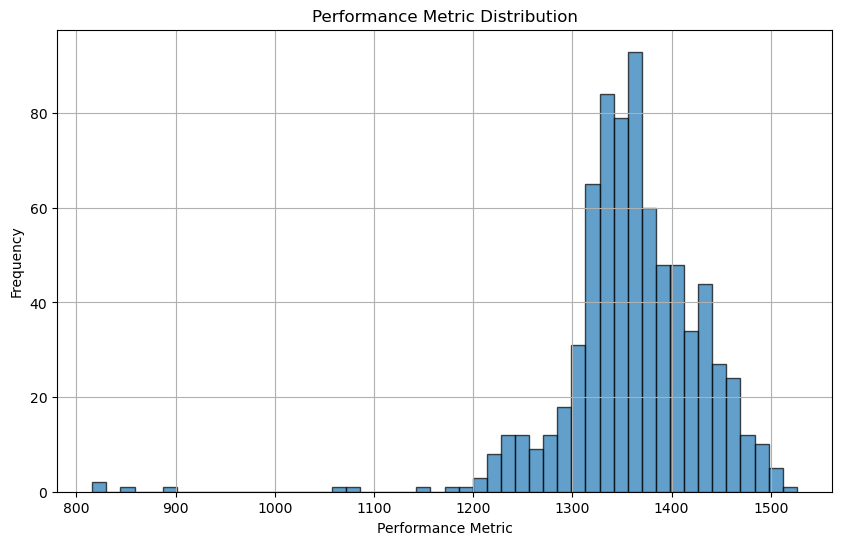

In [124]:
#Check the distribution of the performance metric
plt.figure(figsize=(10, 6))
plt.hist(plant_1['performance_metric'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Performance Metric Distribution')
plt.xlabel('Performance Metric')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Based on the distribution of the performance metric, quantiles can be used to categorize the performance into distinct classes. This approach helps in identifying meaningful thresholds for classification.

In [125]:
quantile_1 = plant_1['performance_metric'].quantile(0.33)
quantile_2 = plant_1['performance_metric'].quantile(0.67)

#Define performance classes
def classify_performance(performance_metric):
    if performance_metric <= quantile_1:
        return 'low'
    elif performance_metric <= quantile_2:
        return 'medium'
    else:
        return 'high'

#Apply classification
plant_1['performance_class'] = plant_1['performance_metric'].apply(classify_performance)


In [126]:
plant_1['performance_class'].value_counts()

medium    254
low       247
high      247
Name: performance_class, dtype: int64

Classify the performance of solar panels into 'low', 'medium', and 'high' using features such as ambient temperature, module temperature, daily yield, and total yield.

# Multinomial Logistic Regression

Multinomial Logistic Regression is used for multi-class classification problems where the dependent variable has three or more categories. This method models the probability of each class using multiple logistic functions.

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

X = plant_1[['ambient_temperature', 'module_temperature', 'daily_yield',  'total_yield']]
y = plant_1['performance_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(random_state=42, max_iter=10000, multi_class='multinomial')
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[52  0 25]
 [18  0 56]
 [32  0 42]]
              precision    recall  f1-score   support

        high       0.51      0.68      0.58        77
         low       0.00      0.00      0.00        74
      medium       0.34      0.57      0.43        74

    accuracy                           0.42       225
   macro avg       0.28      0.41      0.34       225
weighted avg       0.29      0.42      0.34       225



# Linear Discriminant Analysis (LDA)

Linear Discriminant Analysis (LDA) is a classification method used to find a linear combination of features that best separates two or more classes of objects or events. It is particularly useful for classification problems with more than two classes and works by modeling the differences between the classes.

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[63  8  6]
 [10 46 18]
 [30 19 25]]
              precision    recall  f1-score   support

        high       0.61      0.82      0.70        77
         low       0.63      0.62      0.63        74
      medium       0.51      0.34      0.41        74

    accuracy                           0.60       225
   macro avg       0.58      0.59      0.58       225
weighted avg       0.58      0.60      0.58       225



# K-Nearest Neighbors (KNN)

K-Nearest Neighbors (KNN) is a non-parametric classification algorithm used to assign a class to a sample based on the majority class of its k nearest neighbors in the feature space. It is effective for problems where the decision boundary is not linear and can be easily implemented and understood.

In [129]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)  #Modify n_neighbors to experiment with different values ​​of k
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[44 18 15]
 [15 42 17]
 [23 28 23]]
              precision    recall  f1-score   support

        high       0.54      0.57      0.55        77
         low       0.48      0.57      0.52        74
      medium       0.42      0.31      0.36        74

    accuracy                           0.48       225
   macro avg       0.48      0.48      0.48       225
weighted avg       0.48      0.48      0.48       225



Optimizing K-Nearest Neighbors (KNN): Choosing the optimal number of neighbors (k) is crucial for the performance of the K-Nearest Neighbors algorithm. In this section, we evaluate the model for different values of k to identify the one that minimizes the error on the test set.

In [130]:
#List of K values ​​to test
k_values = range(1, 51)
training_errors = []
test_errors = []

#Training and evaluating the KNN model for each value of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)
    
    training_errors.append(1 - accuracy_score(y_train, y_train_pred))
    test_errors.append(1 - accuracy_score(y_test, y_test_pred))

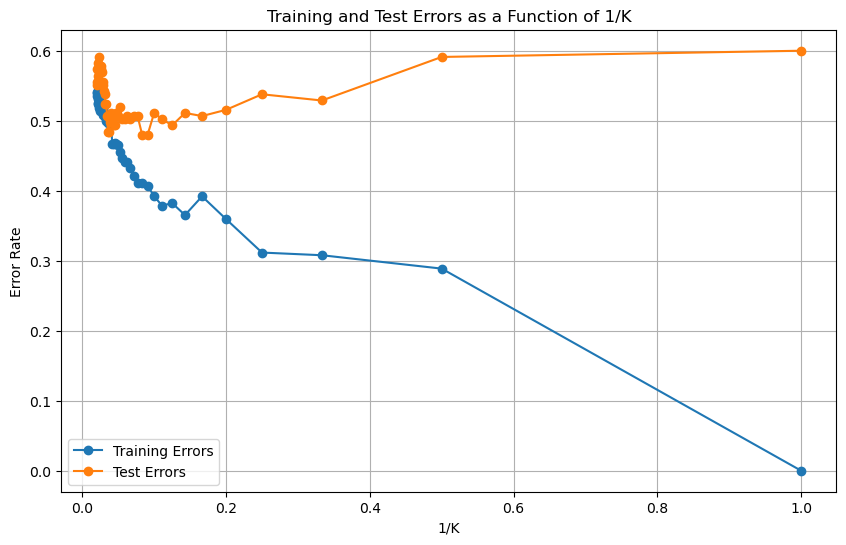

In [131]:
plt.figure(figsize=(10, 6))
plt.plot([1/k for k in k_values], training_errors, label='Training Errors', marker='o')
plt.plot([1/k for k in k_values], test_errors, label='Test Errors', marker='o')
plt.xlabel('1/K')
plt.ylabel('Error Rate')
plt.title('Training and Test Errors as a Function of 1/K')
plt.legend()
plt.grid(True)
plt.show()

In [132]:
#Find the value of K for which the test error is minimum
min_test_error = min(test_errors)
optimal_k = k_values[test_errors.index(min_test_error)]
print(f'Il valore ottimale di K è {optimal_k} con un test error di {min_test_error:.4f}')

Il valore ottimale di K è 11 con un test error di 0.4800


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors = optimal_k)  #Modify n_neighbors to experiment with different values ​​of k
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[46 19 12]
 [11 46 17]
 [24 25 25]]
              precision    recall  f1-score   support

        high       0.57      0.60      0.58        77
         low       0.51      0.62      0.56        74
      medium       0.46      0.34      0.39        74

    accuracy                           0.52       225
   macro avg       0.51      0.52      0.51       225
weighted avg       0.51      0.52      0.51       225



# Random Forest in Classification

Random Forest is an ensemble learning method that is highly effective for classification tasks. It builds multiple decision trees and merges them together to get a more accurate and stable prediction. Each individual tree in a random forest spits out a class prediction, and the class with the most votes becomes the model’s prediction.

In [134]:
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#Training the Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

print("Order of classes:", rf.classes_)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Order of classes: ['high' 'low' 'medium']
[[70  0  7]
 [ 2 55 17]
 [ 6 14 54]]
              precision    recall  f1-score   support

        high       0.90      0.91      0.90        77
         low       0.80      0.74      0.77        74
      medium       0.69      0.73      0.71        74

    accuracy                           0.80       225
   macro avg       0.80      0.79      0.79       225
weighted avg       0.80      0.80      0.80       225

